<a href="https://www.kaggle.com/code/leekahwin/pretty-visualize-country-populations-in-order?scriptVersionId=104771903" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

This notebook will show interesting visualisations about population trends for countries and as well clusters. As a result, Top 15 Fastest, Slowest growing population countries visualisation idioms were plotted in order. Plus, due to COVID-19 happens in 2019, I was curious how is the population trend looks like. It seems to me that the number 1 is surprising. Let's discover it.

Author: Morris Lee <br>
Date: 3rd Sept 2022

#### [Preprocessing Part](#1)
* [Import Packages and Read Data](#1.1)
* [Separate Country and Cluster](#1.2)
* [Transpose Dataframe with Countries as Columns](#1.3)
    
#### [Analysis Part](#2)
* [Define Visualisation Functions](#2.1)
* [Top 15 Fastest Growing Population Countries ](#2.2)
* [Top 15 Slowest Growing Population Countries ](#2.3)
* [Top 15 Slowing Growing Population Countries Since 2019](#2.31)
* [Visualising 50 Clusters](#2.4)

# Preprocessing Part <a class="anchor" id="1"></a>

## Import Packages and Read Data <a class="anchor" id="1.1"></a>

In [1]:
import os
import pandas as pd
from geopy.geocoders import Nominatim
from matplotlib import pyplot as plt
import matplotlib
import pycountry
import numpy as np

def shape(df,df_name):
    print(f'STATUS: Dimension of "{df_name}" = {df.shape}')
    
    
df = pd.read_csv("/kaggle/input/population-dataset/World-population-by-countries-dataset.csv")
df = df.dropna()
df = df.sort_values(by = '2021', ascending=False)
df

Country Name Country Code          1960          1961  \
259                   World          WLD  3.032156e+09  3.071596e+09   
103        IDA & IBRD total          IBT  2.299245e+09  2.329155e+09   
140     Low & middle income          LMY  2.244700e+09  2.273945e+09   
156           Middle income          MIC  2.103847e+09  2.129932e+09   
102               IBRD only          IBD  1.919643e+09  1.940357e+09   
..                      ...          ...           ...           ...   
84                Gibraltar          GIB  2.342000e+04  2.380800e+04   
255  British Virgin Islands          VGB  8.053000e+03  8.164000e+03   
188                   Palau          PLW  9.769000e+03  1.004600e+04   
245                  Tuvalu          TUV  5.321000e+03  5.330000e+03   
179                   Nauru          NRU  4.377000e+03  4.627000e+03   

             1962          1963          1964          1965          1966  \
259  3.124561e+09  3.189656e+09  3.255146e+09  3.322047e+09  3.392098e+09   
103  2.372381e+09  2.427869e+09  2.483840e+09  2.541415e+09  2.602627e+09   
140  2.316484e+09  2.371218e+09  2.426432e+09  2.483423e+09  2.544090e+09   
156  2.169233e+09  2.220611e+09  2.272301e+09  2.325560e+09  2.382277e+09   
102  1.974019e+09  2.019554e+09  2.065153e+09  2.111931e+09  2.161881e+09   
..            ...           ...           ...           ...           ...   
84   2.430700e+04  2.488900e+04  2.547800e+04  2.607900e+04  2.663100e+04   
255  8.319000e+03  8.469000e+03  8.644000e+03  8.836000e+03  9.022000e+03   
188  1.032900e+04  1.056600e+04  1.079200e+04  1.100500e+04  1.117800e+04   
245  5.340000e+03  5.341000e+03  5.354000e+03  5.388000e+03  5.435000e+03   
179  4.942000e+03  5.270000e+03  5.590000e+03  5.859000e+03  6.065000e+03   

             1967  ...          2012          2013          2014  \
259  3.461620e+09  ...  7.089255e+09  7.175500e+09  7.261847e+09   
103  2.663896e+09  ...  5.947406e+09  6.026674e+09  6.105863e+09   
140  2.604644e+09  ...  5.869617e+09  5.948566e+09  6.027587e+09   
156  2.438677e+09  ...  5.313946e+09  5.378523e+09  5.442820e+09   
102  2.211446e+09  ...  4.518944e+09  4.566063e+09  4.612372e+09   
..            ...  ...           ...           ...           ...   
84   2.717200e+04  ...  3.365300e+04  3.369400e+04  3.372600e+04   
255  9.213000e+03  ...  2.865400e+04  2.885000e+04  2.898500e+04   
188  1.132900e+04  ...  1.763500e+04  1.760300e+04  1.762500e+04   
245  5.510000e+03  ...  1.074400e+04  1.084900e+04  1.097300e+04   
179  6.221000e+03  ...  1.013600e+04  1.020800e+04  1.028900e+04   

             2015          2016          2017          2018          2019  \
259  7.347679e+09  7.433651e+09  7.519371e+09  7.602716e+09  7.683806e+09   
103  6.184735e+09  6.263736e+09  6.343293e+09  6.420905e+09  6.496952e+09   
140  6.106513e+09  6.185805e+09  6.265830e+09  6.343992e+09  6.420461e+09   
156  5.506549e+09  5.570151e+09  5.634011e+09  5.695494e+09  5.754729e+09   
102  4.657516e+09  4.701907e+09  4.746019e+09  4.787344e+09  4.826259e+09   
..            ...           ...           ...           ...           ...   
84   3.374200e+04  3.373800e+04  3.372300e+04  3.371500e+04  3.370600e+04   
255  2.914800e+04  2.935500e+04  2.956700e+04  2.979500e+04  3.003300e+04   
188  1.766500e+04  1.771800e+04  1.780900e+04  1.791100e+04  1.800100e+04   
245  1.109900e+04  1.123200e+04  1.136500e+04  1.150500e+04  1.165500e+04   
179  1.037400e+04  1.047400e+04  1.057700e+04  1.067800e+04  1.076400e+04   

             2020          2021  
259  7.763933e+09  7.836631e+09  
103  6.571053e+09  6.642614e+09  
140  6.494812e+09  6.566552e+09  
156  5.811279e+09  5.864625e+09  
102  4.862446e+09  4.895295e+09  
..            ...           ...  
84   3.369100e+04  3.369100e+04  
255  3.023700e+04  3.042300e+04  
188  1.809200e+04  1.817400e+04  
245  1.179200e+04  1.192500e+04  
179  1.083400e+04  1.087300e+04  

[262 rows x 64 columns]

## Separate Country and Cluster <a class="anchor" id="1.2"></a>

In [2]:
# separate country and cluster
df['is_country'] = df.apply(lambda x: pycountry.countries.get(alpha_3=x['Country Code']),axis=1)
df.drop('Country Code', axis=1, inplace=True)

df_country = df[df['is_country'].notna()].drop('is_country', axis=1)

df_cluster = df[df['is_country'].isna()].drop('is_country', axis=1)

shape(df_country,'df_country')
display(df_country.head())

shape(df_cluster,'df_cluster')
display(df_cluster.head())

STATUS: Dimension of "df_country" = (212, 63)


Country Name         1960         1961         1962         1963  \
40           China  667070000.0  660330000.0  665770000.0  682335000.0   
109          India  450547675.0  459642166.0  469077191.0  478825602.0   
251  United States  180671000.0  183691000.0  186538000.0  189242000.0   
106      Indonesia   87751066.0   90098396.0   92518373.0   95015295.0   
184       Pakistan   44988690.0   46065229.0   47198886.0   48387293.0   

            1964         1965         1966         1967         1968  ...  \
40   698355000.0  715185000.0  735400000.0  754550000.0  774510000.0  ...   
109  488848139.0  499123328.0  509631509.0  520400577.0  531513834.0  ...   
251  191889000.0  194303000.0  196560000.0  198712000.0  200706000.0  ...   
106   97596728.0  100267070.0  103025423.0  105865576.0  108779926.0  ...   
184   49627623.0   50917975.0   52260183.0   53655783.0   55102690.0  ...   

             2012          2013          2014          2015          2016  \
40   1.354190e+09  1.363240e+09  1.371860e+09  1.379860e+09  1.387790e+09   
109  1.265780e+09  1.280842e+09  1.295601e+09  1.310152e+09  1.324517e+09   
251  3.138777e+08  3.160599e+08  3.183863e+08  3.207390e+08  3.230718e+08   
106  2.484517e+08  2.518053e+08  2.551281e+08  2.583833e+08  2.615564e+08   
184  1.872801e+08  1.912608e+08  1.953050e+08  1.994270e+08  2.036314e+08   

             2017          2018          2019          2020          2021  
40   1.396215e+09  1.402760e+09  1.407745e+09  1.411100e+09  1.412360e+09  
109  1.338677e+09  1.352642e+09  1.366418e+09  1.380004e+09  1.393409e+09  
251  3.251221e+08  3.268382e+08  3.283300e+08  3.315011e+08  3.318937e+08  
106  2.646510e+08  2.676705e+08  2.706256e+08  2.735236e+08  2.763618e+08  
184  2.079062e+08  2.122283e+08  2.165653e+08  2.208923e+08  2.251999e+08  

[5 rows x 63 columns]

STATUS: Dimension of "df_cluster" = (50, 63)


Country Name          1960          1961          1962  \
259                World  3.032156e+09  3.071596e+09  3.124561e+09   
103     IDA & IBRD total  2.299245e+09  2.329155e+09  2.372381e+09   
140  Low & middle income  2.244700e+09  2.273945e+09  2.316484e+09   
156        Middle income  2.103847e+09  2.129932e+09  2.169233e+09   
102            IBRD only  1.919643e+09  1.940357e+09  1.974019e+09   

             1963          1964          1965          1966          1967  \
259  3.189656e+09  3.255146e+09  3.322047e+09  3.392098e+09  3.461620e+09   
103  2.427869e+09  2.483840e+09  2.541415e+09  2.602627e+09  2.663896e+09   
140  2.371218e+09  2.426432e+09  2.483423e+09  2.544090e+09  2.604644e+09   
156  2.220611e+09  2.272301e+09  2.325560e+09  2.382277e+09  2.438677e+09   
102  2.019554e+09  2.065153e+09  2.111931e+09  2.161881e+09  2.211446e+09   

             1968  ...          2012          2013          2014  \
259  3.532783e+09  ...  7.089255e+09  7.175500e+09  7.261847e+09   
103  2.726851e+09  ...  5.947406e+09  6.026674e+09  6.105863e+09   
140  2.666962e+09  ...  5.869617e+09  5.948566e+09  6.027587e+09   
156  2.496665e+09  ...  5.313946e+09  5.378523e+09  5.442820e+09   
102  2.262350e+09  ...  4.518944e+09  4.566063e+09  4.612372e+09   

             2015          2016          2017          2018          2019  \
259  7.347679e+09  7.433651e+09  7.519371e+09  7.602716e+09  7.683806e+09   
103  6.184735e+09  6.263736e+09  6.343293e+09  6.420905e+09  6.496952e+09   
140  6.106513e+09  6.185805e+09  6.265830e+09  6.343992e+09  6.420461e+09   
156  5.506549e+09  5.570151e+09  5.634011e+09  5.695494e+09  5.754729e+09   
102  4.657516e+09  4.701907e+09  4.746019e+09  4.787344e+09  4.826259e+09   

             2020          2021  
259  7.763933e+09  7.836631e+09  
103  6.571053e+09  6.642614e+09  
140  6.494812e+09  6.566552e+09  
156  5.811279e+09  5.864625e+09  
102  4.862446e+09  4.895295e+09  

[5 rows x 63 columns]

## Transpose Dataframe with Countries as Columns <a class="anchor" id="1.3"></a>

In [3]:
def make_df(df, name):
    df = df.set_index('Country Name').T.reset_index().rename(columns = {'index':'date'})
    df['date'] = pd.to_datetime(df['date'], format='%Y',errors='coerce')
    shape(df, name)
    print("Dataframe head")
    display(df.head())
    return df

df_country = make_df(df_country,'df_country')
df_cluster = make_df(df_cluster, 'df_cluster')


STATUS: Dimension of "df_country" = (62, 213)
Dataframe head


Country Name       date        China        India  United States   Indonesia  \
0            1960-01-01  667070000.0  450547675.0    180671000.0  87751066.0   
1            1961-01-01  660330000.0  459642166.0    183691000.0  90098396.0   
2            1962-01-01  665770000.0  469077191.0    186538000.0  92518373.0   
3            1963-01-01  682335000.0  478825602.0    189242000.0  95015295.0   
4            1964-01-01  698355000.0  488848139.0    191889000.0  97596728.0   

Country Name    Pakistan      Brazil     Nigeria  Bangladesh  \
0             44988690.0  72179235.0  45138460.0  48013505.0   
1             46065229.0  74311338.0  46063570.0  49362834.0   
2             47198886.0  76514329.0  47029818.0  50752150.0   
3             48387293.0  78772647.0  48032932.0  52202008.0   
4             49627623.0  81064572.0  49066762.0  53741721.0   

Country Name  Russian Federation  ...   Monaco  St. Martin (French part)  \
0                    119897000.0  ...  22461.0                    3898.0   
1                    121236000.0  ...  22813.0                    3996.0   
2                    122591000.0  ...  23043.0                    4078.0   
3                    123960000.0  ...  23165.0                    4179.0   
4                    125345000.0  ...  23236.0                    4302.0   

Country Name  Turks and Caicos Islands  Liechtenstein  San Marino  Gibraltar  \
0                               5825.0        16501.0     15440.0    23420.0   
1                               5867.0        16894.0     15836.0    23808.0   
2                               5884.0        17300.0     16255.0    24307.0   
3                               5870.0        17724.0     16669.0    24889.0   
4                               5851.0        18170.0     17101.0    25478.0   

Country Name  British Virgin Islands    Palau  Tuvalu   Nauru  
0                             8053.0   9769.0  5321.0  4377.0  
1                             8164.0  10046.0  5330.0  4627.0  
2                             8319.0  10329.0  5340.0  4942.0  
3                             8469.0  10566.0  5341.0  5270.0  
4                             8644.0  10792.0  5354.0  5590.0  

[5 rows x 213 columns]

STATUS: Dimension of "df_cluster" = (62, 51)
Dataframe head


Country Name       date         World  IDA & IBRD total  Low & middle income  \
0            1960-01-01  3.032156e+09      2.299245e+09         2.244700e+09   
1            1961-01-01  3.071596e+09      2.329155e+09         2.273945e+09   
2            1962-01-01  3.124561e+09      2.372381e+09         2.316484e+09   
3            1963-01-01  3.189656e+09      2.427869e+09         2.371218e+09   
4            1964-01-01  3.255146e+09      2.483840e+09         2.426432e+09   

Country Name  Middle income     IBRD only  Early-demographic dividend  \
0              2.103847e+09  1.919643e+09                9.800033e+08   
1              2.129932e+09  1.940357e+09                1.003195e+09   
2              2.169233e+09  1.974019e+09                1.027205e+09   
3              2.220611e+09  2.019554e+09                1.051973e+09   
4              2.272301e+09  2.065153e+09                1.077531e+09   

Country Name  Lower middle income  Upper middle income  East Asia & Pacific  \
0                    9.886261e+08         1.115221e+09         1.041674e+09   
1                    1.011301e+09         1.118631e+09         1.043657e+09   
2                    1.034742e+09         1.134490e+09         1.058120e+09   
3                    1.058918e+09         1.161693e+09         1.083884e+09   
4                    1.083774e+09         1.188526e+09         1.109291e+09   

Country Name  ...  Middle East & North Africa (IDA & IBRD countries)  \
0             ...                                         97553136.0   
1             ...                                        100147125.0   
2             ...                                        102808039.0   
3             ...                                        105546241.0   
4             ...                                        108376349.0   

Country Name  North America    Euro area  Central Europe and the Baltics  \
0               198624409.0  265203956.0                      91401764.0   
1               202007500.0  267621091.0                      92232738.0   
2               205198600.0  270110063.0                      93009498.0   
3               208253700.0  272655396.0                      93840016.0   
4               211262900.0  275163380.0                      94715795.0   

Country Name  Small states  Other small states  Caribbean small states  \
0               14211632.0           9151857.0               4194711.0   
1               14483280.0           9315834.0               4274052.0   
2               14762137.0           9485194.0               4353623.0   
3               15045754.0           9659416.0               4432240.0   
4               15333414.0           9840401.0               4508189.0   

Country Name  Pacific island small states     Kosovo  Channel Islands  
0                                865064.0   947000.0         109419.0  
1                                893394.0   966000.0         110398.0  
2                                923320.0   994000.0         111464.0  
3                                954098.0  1022000.0         112591.0  
4                                984824.0  1050000.0         113777.0  

[5 rows x 51 columns]

# Analysing Part <a class="anchor" id="2"></a>

## Define Visualisation Functions <a class="anchor" id="2.1"></a>

In [4]:
def aggregate_period(df, period, date, target): 
    per = df[date].dt.to_period(period)
    g = df.groupby(per).agg({target: ['sum']})
    g.columns = ['metric']
    g.reset_index(level=0, inplace=True)
    g[date]=g[date].astype(str)
    return g
def visual(df, DATE, target, title, n, l, numElems, scientific_annotation, big_title=False, counter=None):
    date = df[DATE][-n:] ; count_period =df['metric'][-n:]
    if big_title == True:
        topN = rank[rank.country ==target].index[0] +1
        rate_v = rank[rank.country ==target].rate.values[0]
        plt.figure().suptitle(F'Top {topN} Slowest Growing Country Population ({round(rate_v,2)} Times)' , fontsize=20, fontname="Arial",fontweight='bold')
    elif big_title == 'fast':
        topN = rank2[rank2.country ==target].index[0] +1
        rate_v = rank2[rank2.country ==target].rate.values[0]
        plt.figure().suptitle(F'Top {topN} Fastest Growing Country Population ({round(rate_v,2)} Times)' , fontsize=20, fontname="Arial",fontweight='bold')
    elif big_title == 'slow2019':
        topN = rank3[rank3.country ==target].index[0] +1
        rate_v = rank3[rank3.country ==target].rate.values[0]
        plt.figure().suptitle(F'Top {topN} Slowest Growing Country Population Since 2019 ({round(rate_v,2)} Times)' , fontsize=20, fontname="Arial",fontweight='bold')    
    elif big_title == 'cluster':
        plt.figure().suptitle(F'Cluster {counter}/{len(df_cluster.columns[1:])}' , fontsize=12, fontname="Arial")
    plt.plot(date, count_period, linestyle='solid', color='black', marker='o')
    plt.title(f'{title}', fontsize=20, fontname="Arial",fontweight='bold')
    plt.xlabel('Time')
    plt.ylabel(target)
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(14.5, 6.5)
        # To get number of annotations, if 0, then no annotations
    if numElems>0:
        
        # to get number of annotations
        idx = np.round(np.linspace(0, len(df) - 1, numElems)).astype(int)
        
        # to loop all values to plot
        for x,y in zip(date[idx],count_period[idx]):
            
            # if number of digits too long, make it scientific annotations
            if (len(str(y)) >5) & (scientific_annotation ==True):
                label = '{:0.2e}'.format(y)
                plt.annotate((label),
                     (x,y), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(2,10), # distance from text to points (x,y)
                     ha='center' , fontsize=11) # horizontal alignment can be left, right or center
            else:
                label = int(y)
                  
                plt.annotate((f'{label:,}'),
                     (x,y), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(2,10), # distance from text to points (x,y)
                     ha='center' , fontsize=11) # horizontal alignment can be left, right or center
    overall_mean180 = count_period.mean()
    plt.fill_between(date, count_period,overall_mean180,where=(count_period>overall_mean180),alpha=0.10, interpolate=True, color='Green')
    plt.fill_between(date, count_period,overall_mean180,where=(count_period<=overall_mean180),alpha=0.10, interpolate=True, color='Red')

    plt.legend(['number of movies', 'above average', 'below average'],loc=l, prop={'size': 11})
    plt.xticks(rotation=90)
    
    IQR = df.metric.quantile(0.75) - df.metric.quantile(0.25)
    min_y = df.metric.min()-IQR
    max_y = df.metric.max()+IQR
    plt.ylim([min_y, max_y])
    
    return plt.show()

## Top 15 Fastest Growing Population Countries  <a class="anchor" id="2.2"></a>

In [5]:
def get_rank(slowest_growing, start_2019=False):
    country_below_avg = []
    rate_list = []
    for country in df_country.columns[1:]:
        average_pop = df_country[country].mean()
        last_pop = df_country.at[len(df_country)-1, country]
        country_below_avg.append(country)
        if start_2019 == True:
            # get 2019 as the starting
            first_pop = df_country.at[len(df_country)-3, country]
        else:
            # get the earliest 1960 as the begining
            first_pop = df_country.at[0, country]
        rate = (last_pop - first_pop)/first_pop
        rate_list.append(rate)

    rank = pd.DataFrame({'country':country_below_avg, 'rate':rate_list }).sort_values('rate', \
                                                                                      ascending=slowest_growing).reset_index(drop=True).head(15)
    display(rank)
    country_list = rank.country.tolist()[ : :-1]
    print(country_list)
    return rank, country_list

rank2,country_fast = get_rank(slowest_growing = False)

country        rate
0        United Arab Emirates  107.108714
1                       Qatar   60.847582
2   Sint Maarten (Dutch part)   14.123897
3                    Djibouti   10.983129
4                      Jordan   10.005251
5                     Bahrain    9.763441
6    St. Martin (French part)    9.066444
7                        Oman    8.467183
8                Saudi Arabia    7.648082
9              Cayman Islands    7.449555
10              Cote d'Ivoire    6.721756
11                      Niger    6.415900
12                     Uganda    5.963631
13                Gambia, The    5.812611
14                      Kenya    5.771570

['Kenya', 'Gambia, The', 'Uganda', 'Niger', "Cote d'Ivoire", 'Cayman Islands', 'Saudi Arabia', 'Oman', 'St. Martin (French part)', 'Bahrain', 'Jordan', 'Djibouti', 'Sint Maarten (Dutch part)', 'Qatar', 'United Arab Emirates']


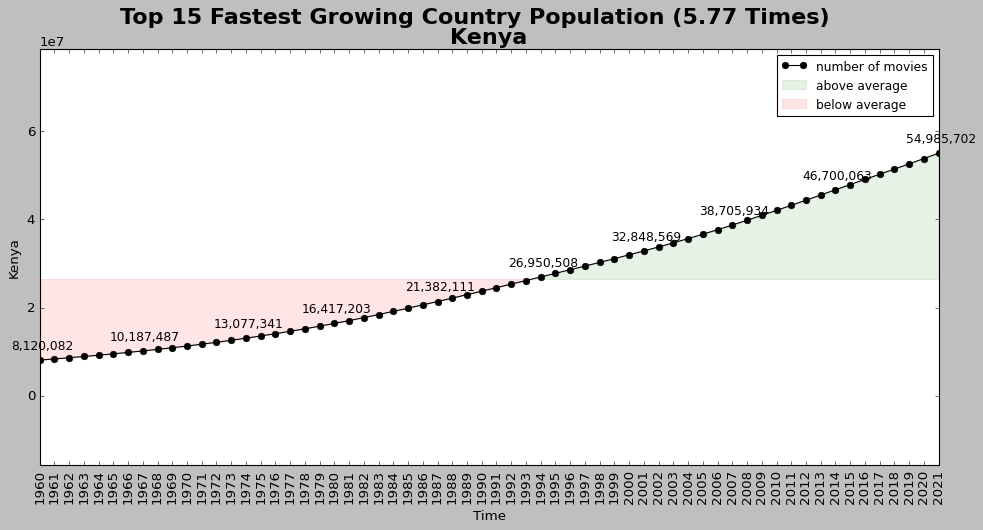

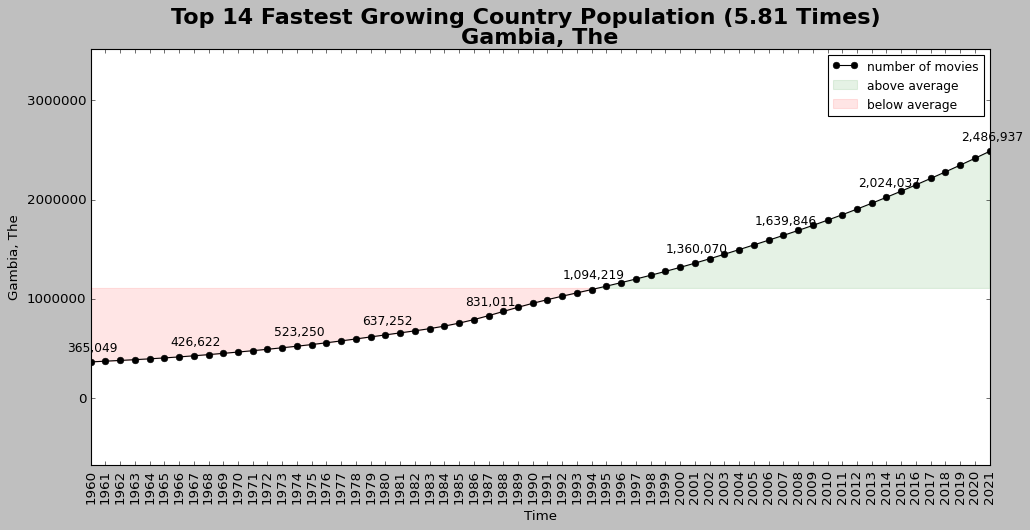

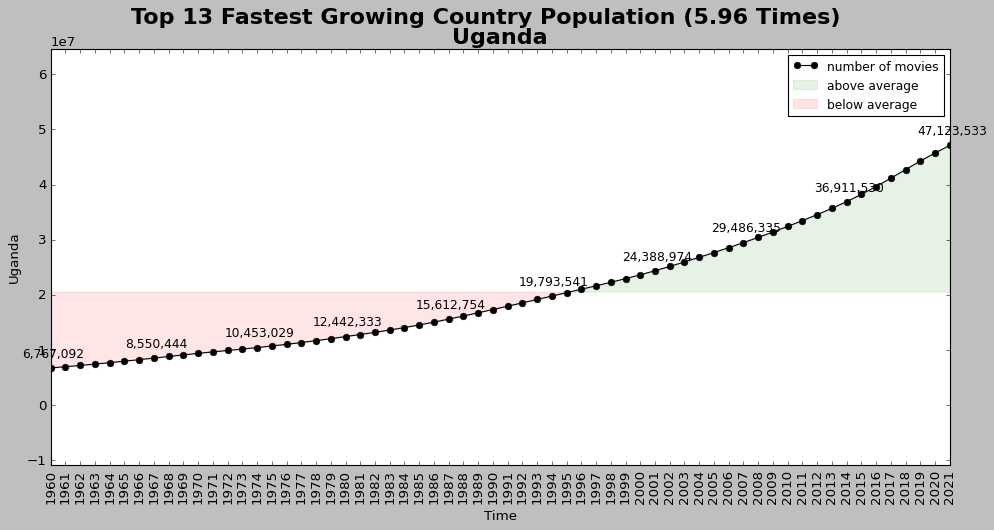

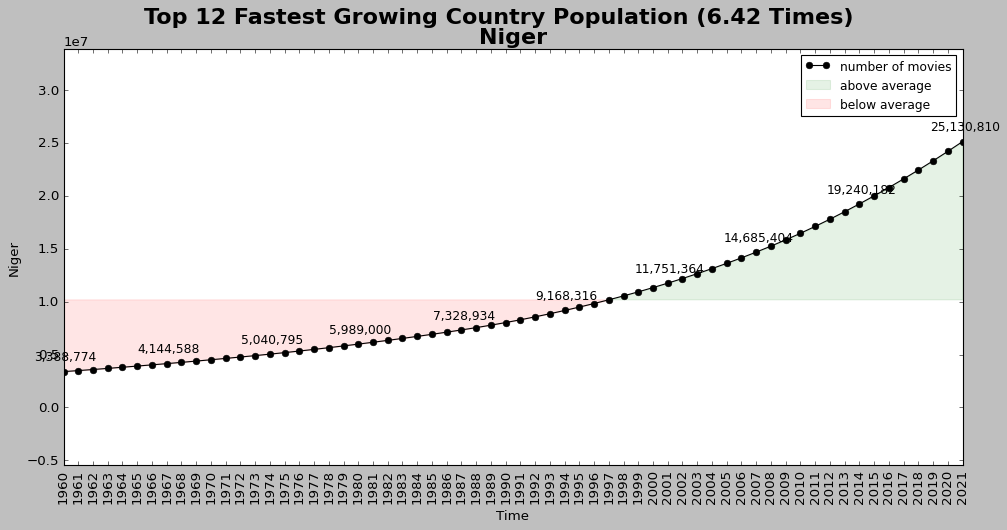

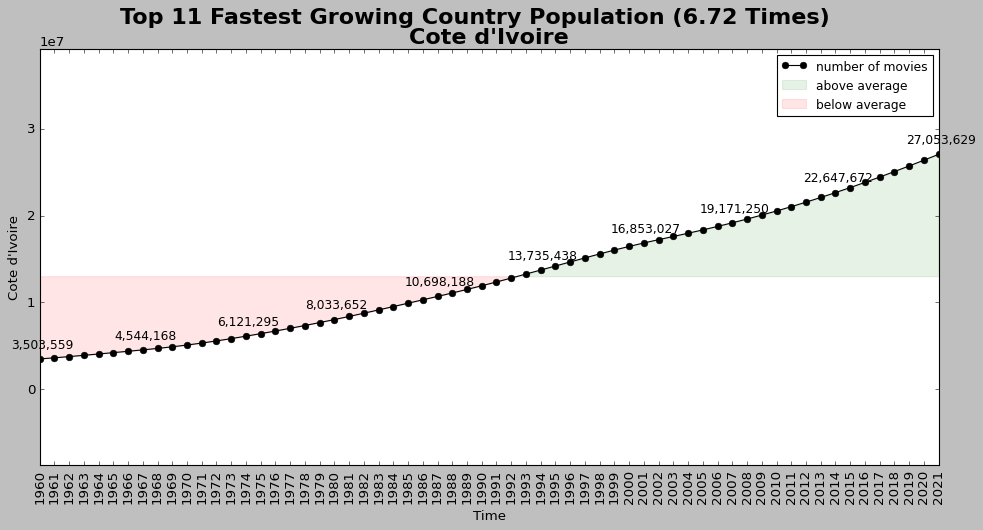

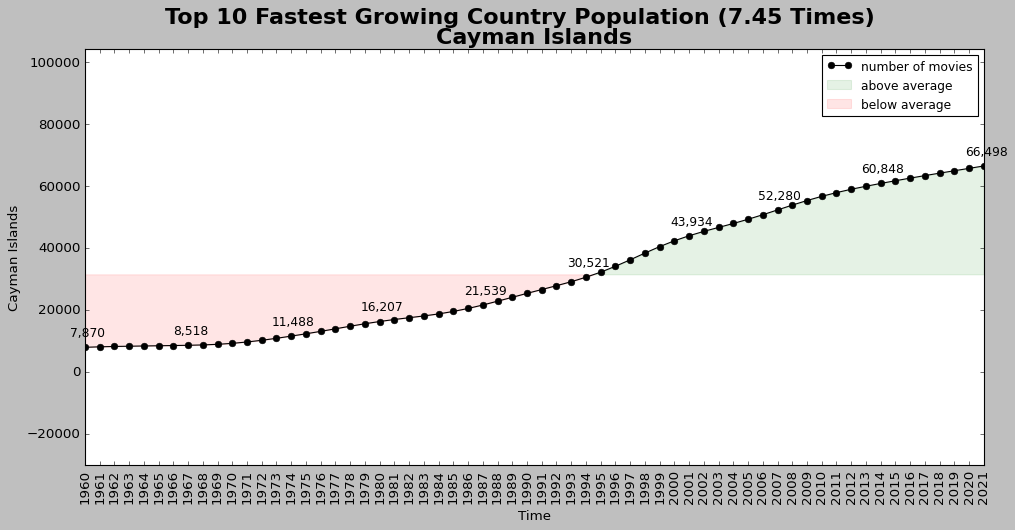

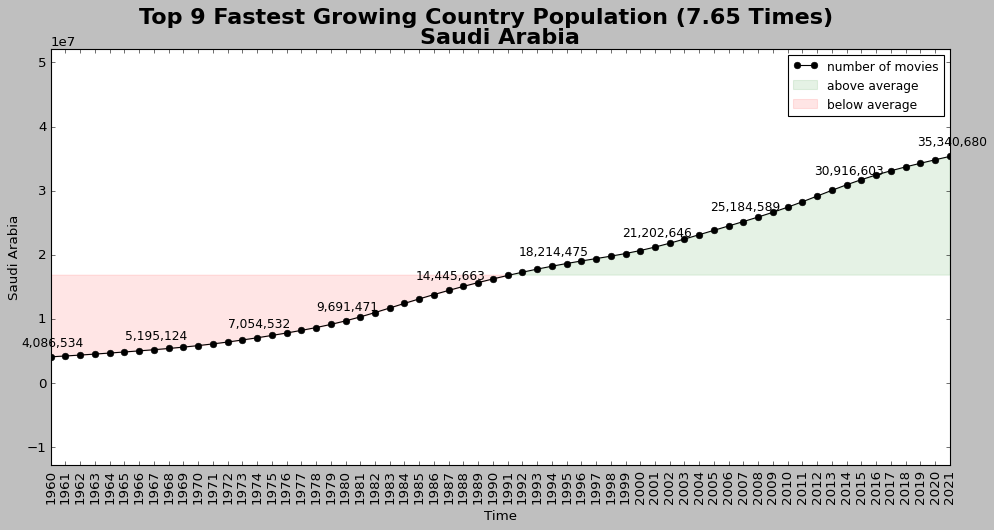

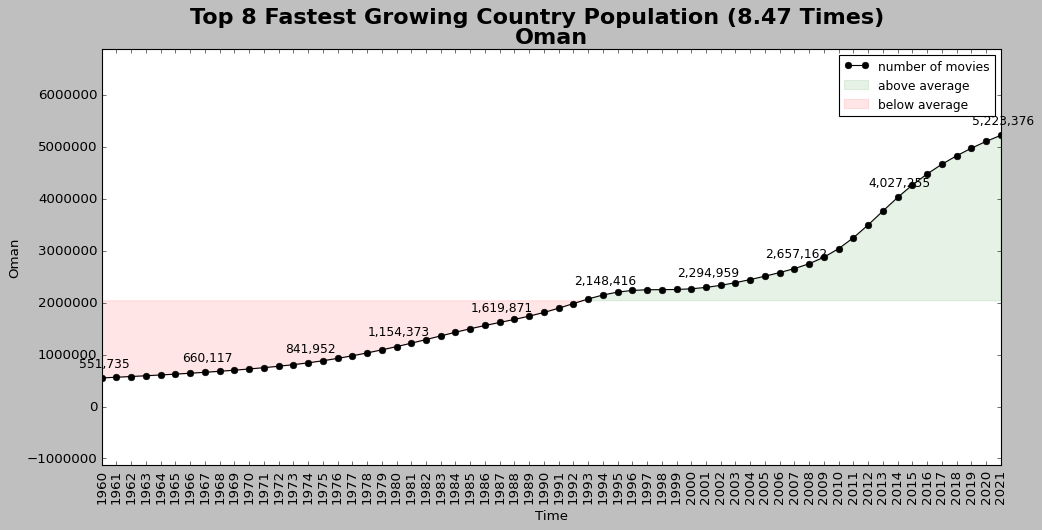

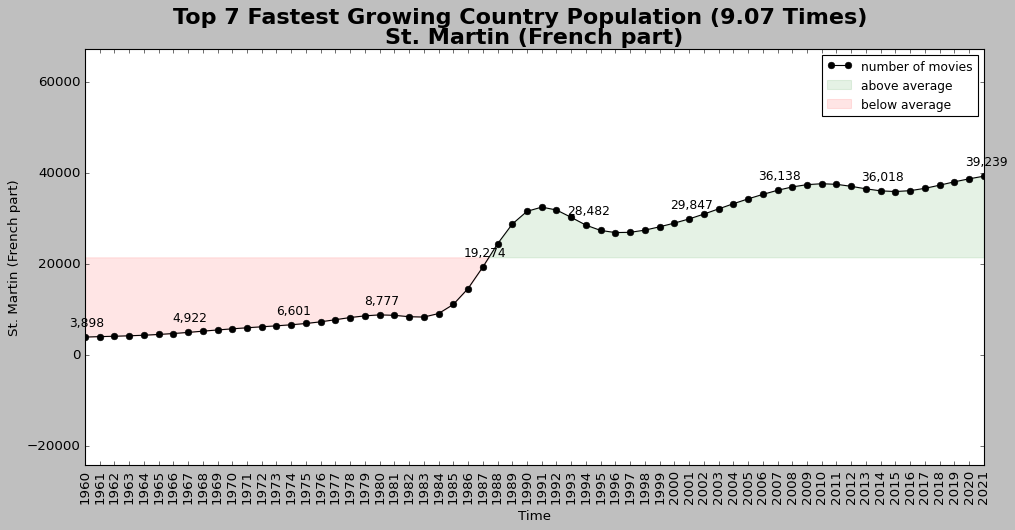

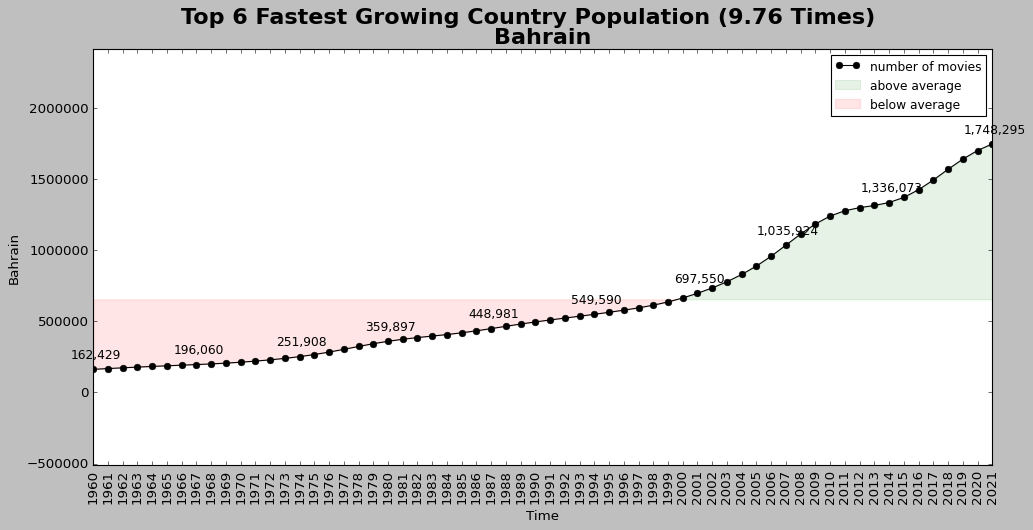

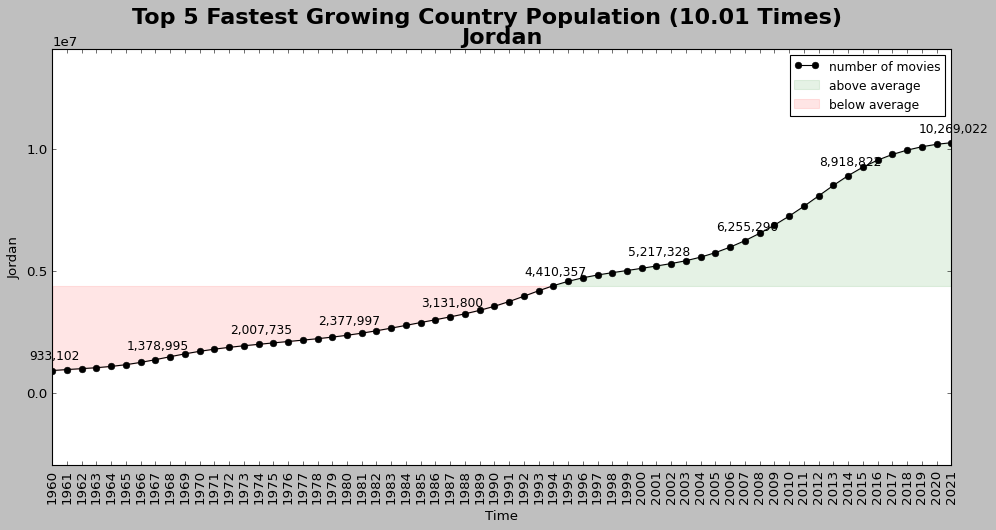

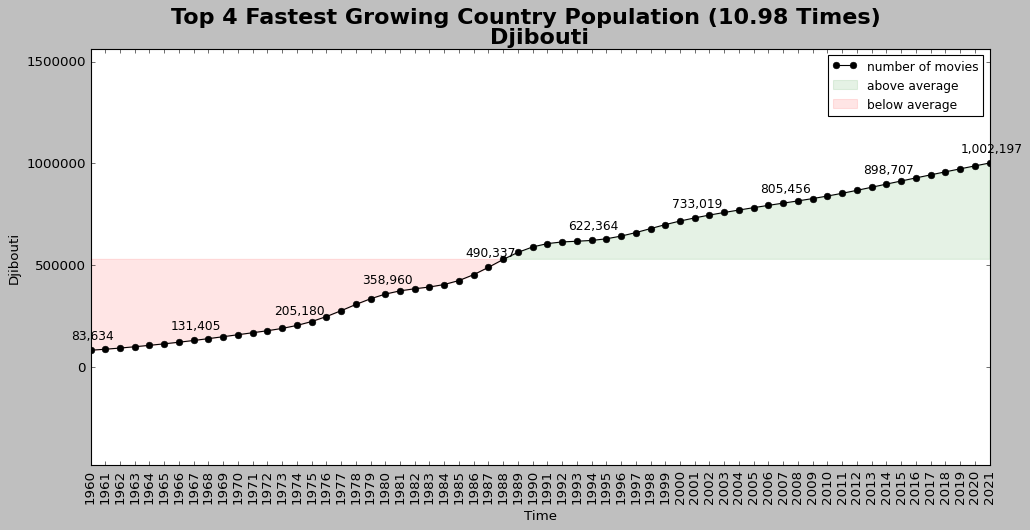

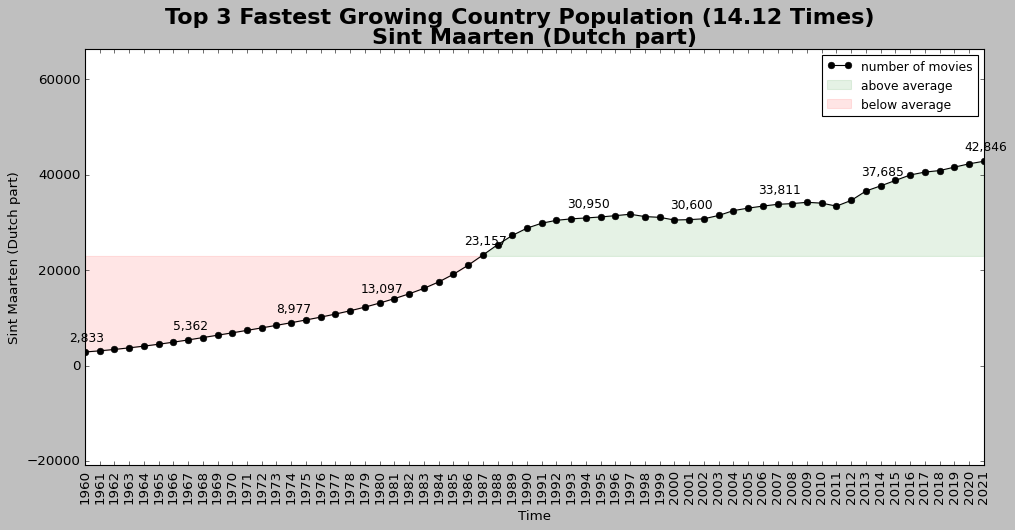

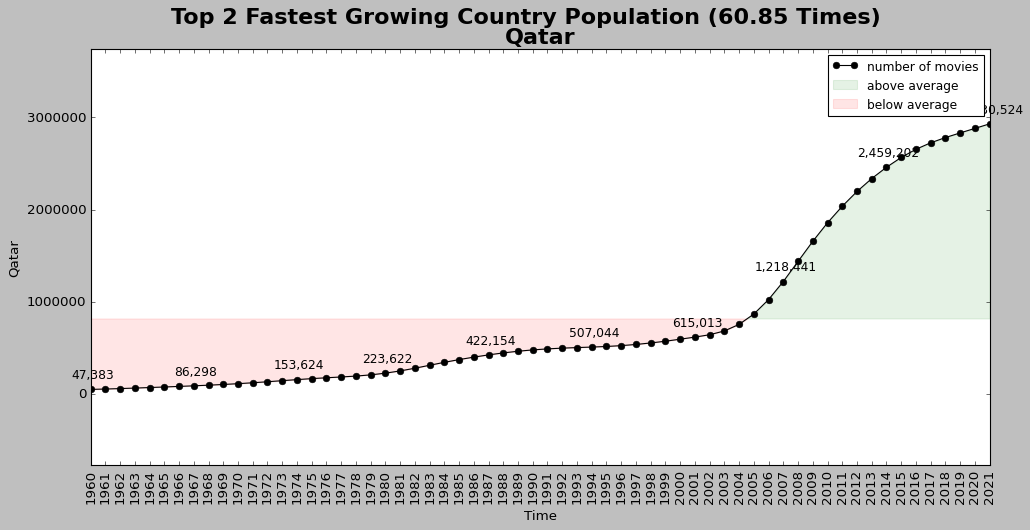

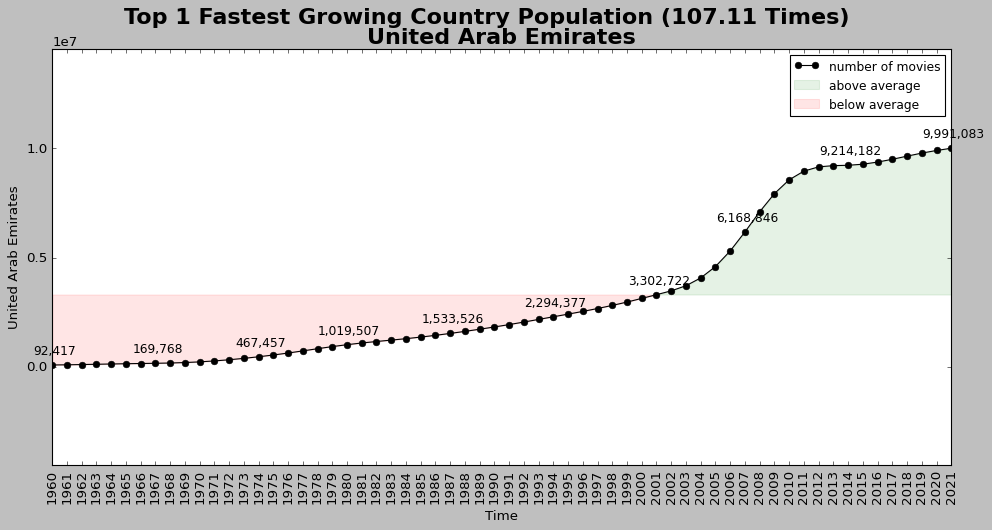

In [6]:
# Top 15 Fastest Growing Population Countries
plt.style.use('classic')
date = 'date'
for target in country_fast:
    y = aggregate_period(df_country, 'y', date, target)
    visual(y ,date,target,f"{target}",100,1,10, scientific_annotation=False,big_title='fast')

## Top 15 Slowest Growing Population Countries  <a class="anchor" id="2.3"></a>

In [7]:
rank,country_below_avg = get_rank(slowest_growing = True)

country      rate
0                 Bulgaria -0.123071
1                   Latvia -0.112126
2                  Croatia -0.058254
3                  Hungary -0.027452
4                Lithuania  0.006036
5   Bosnia and Herzegovina  0.011717
6                  Georgia  0.017284
7                  Ukraine  0.026953
8                   Serbia  0.035726
9                  Romania  0.038477
10     St. Kitts and Nevis  0.045841
11                 Estonia  0.097163
12          Czech Republic  0.114709
13                 Belarus  0.139341
14                 Germany  0.141652

['Germany', 'Belarus', 'Czech Republic', 'Estonia', 'St. Kitts and Nevis', 'Romania', 'Serbia', 'Ukraine', 'Georgia', 'Bosnia and Herzegovina', 'Lithuania', 'Hungary', 'Croatia', 'Latvia', 'Bulgaria']


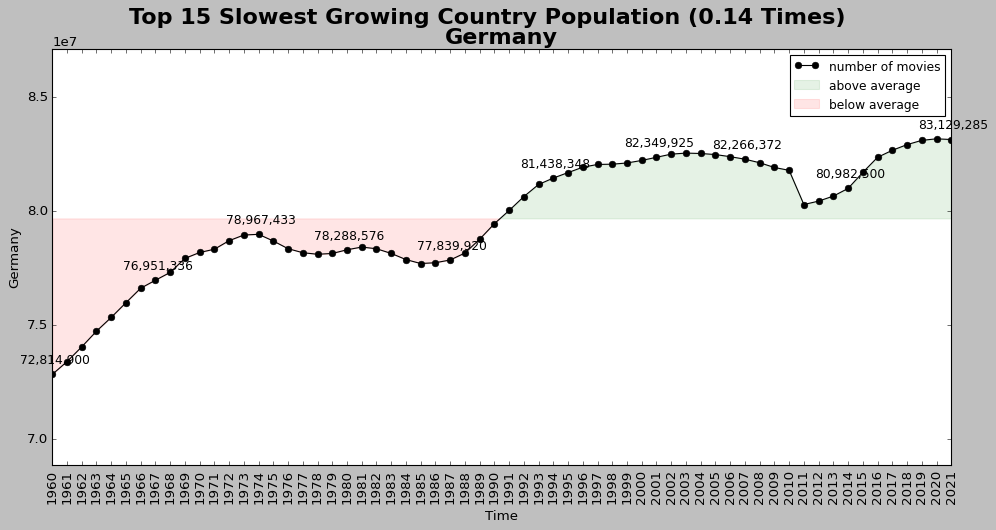

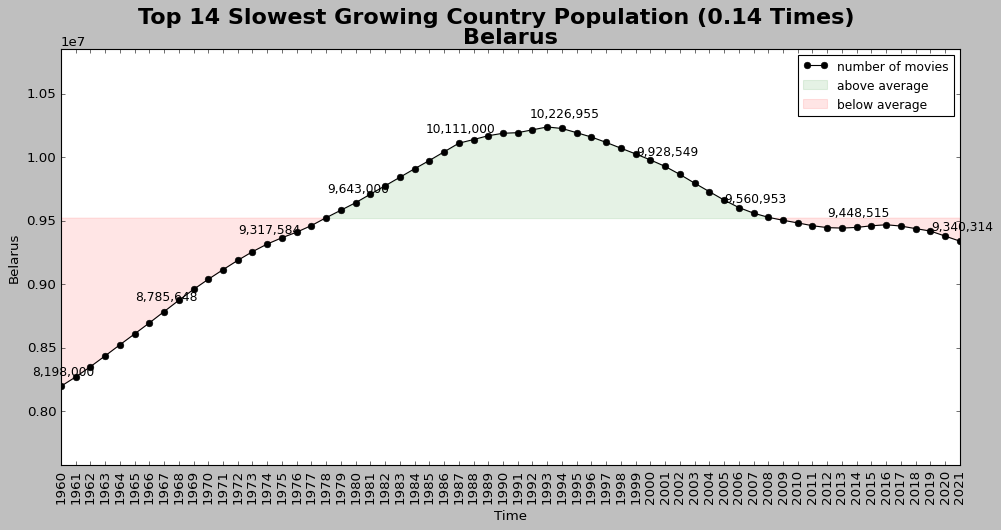

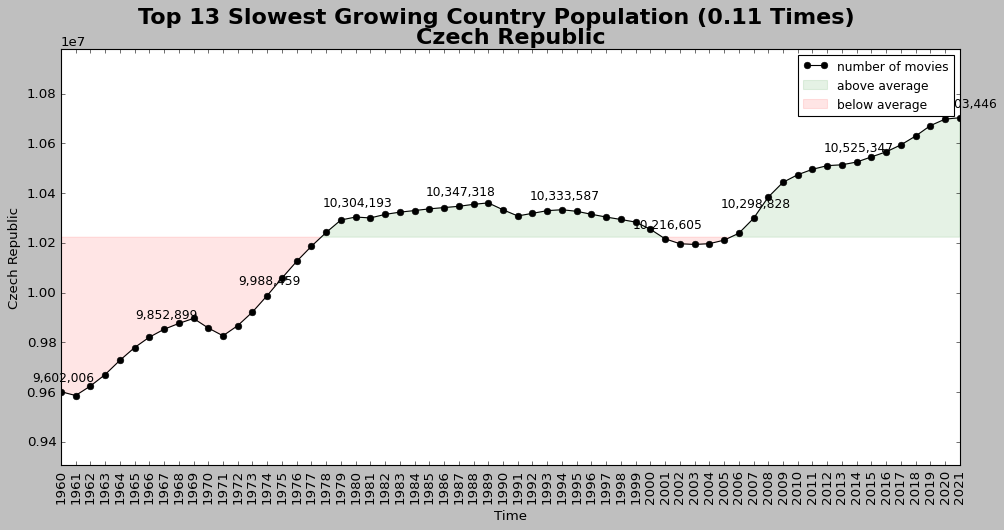

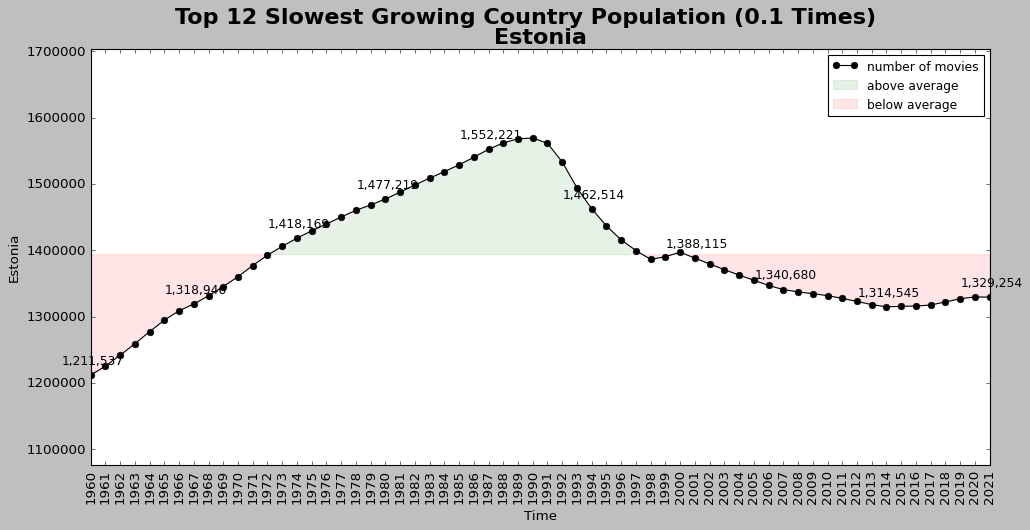

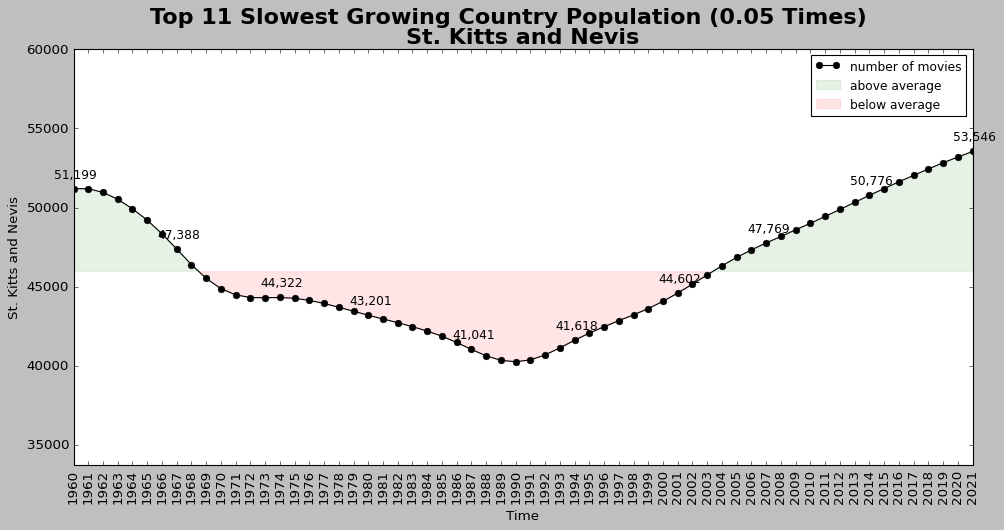

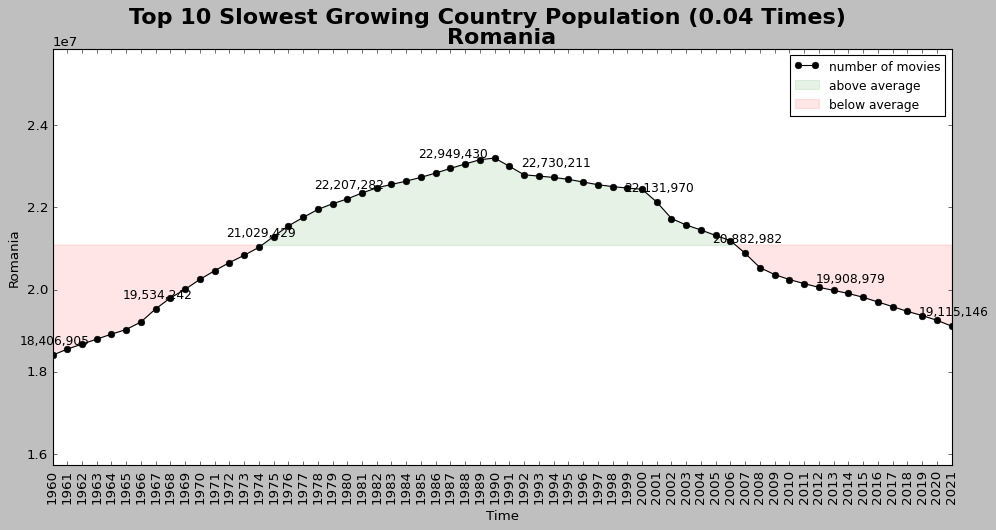

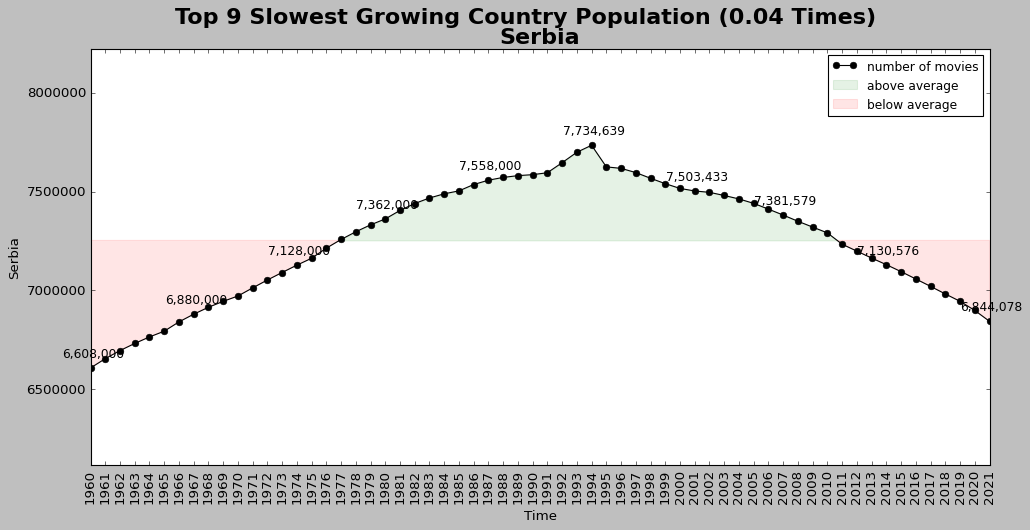

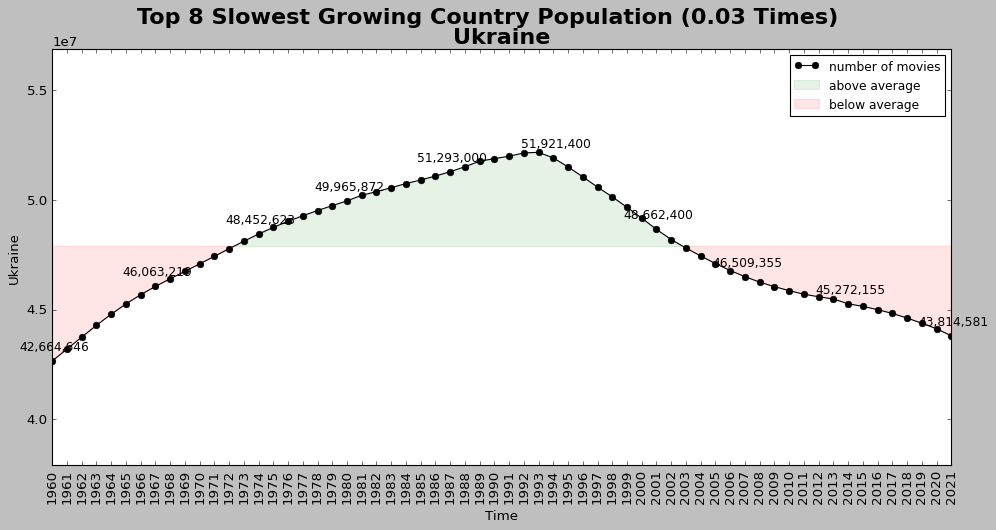

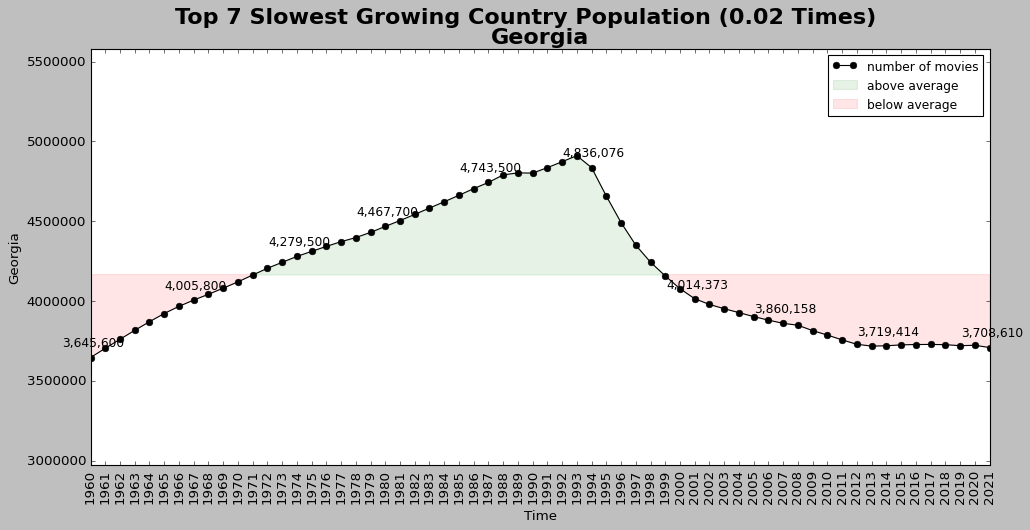

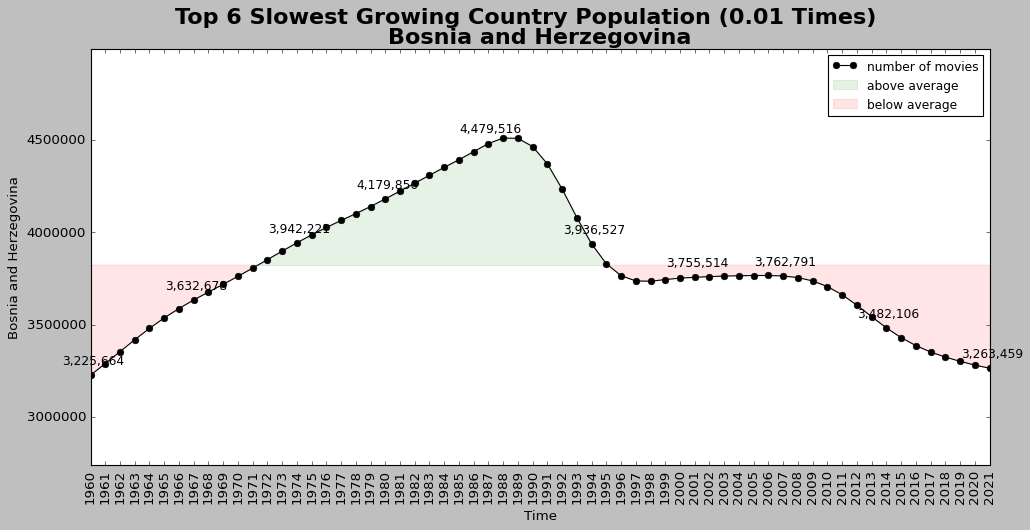

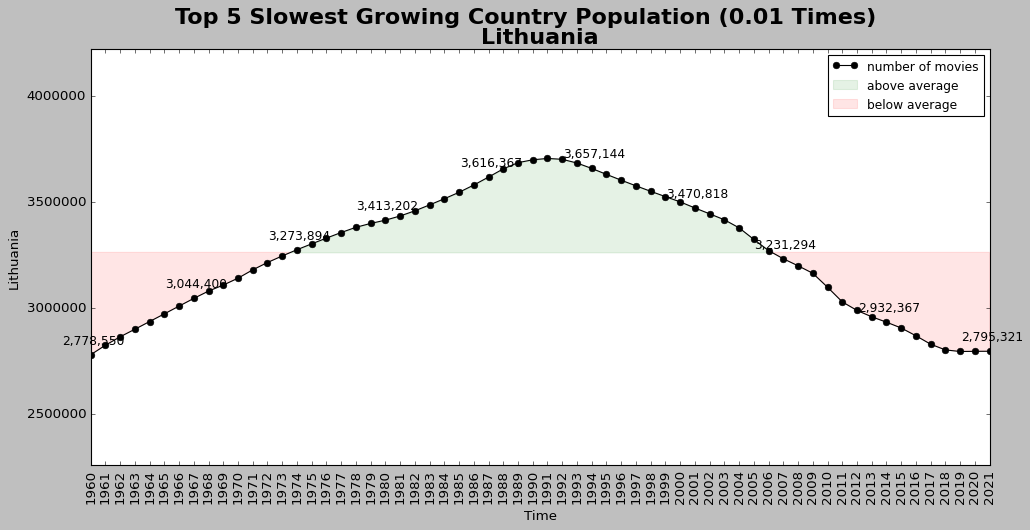

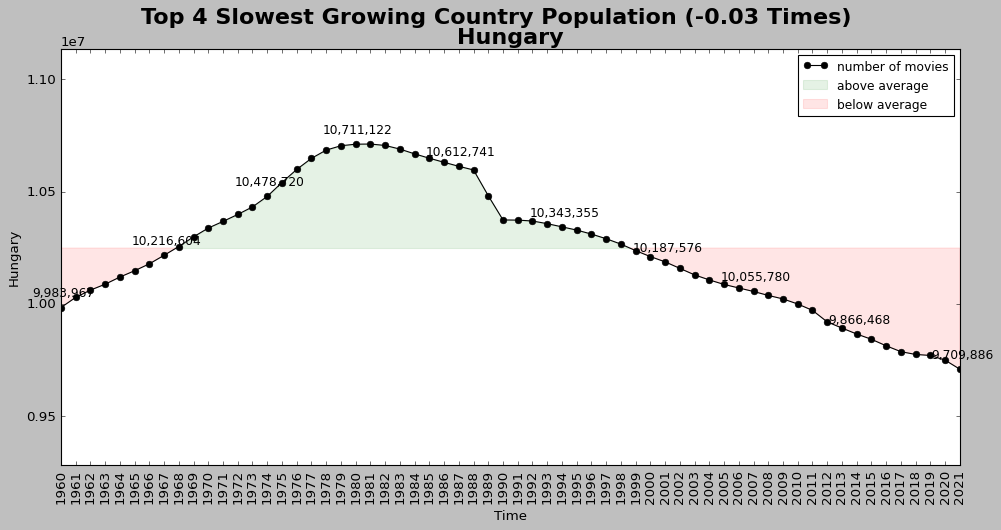

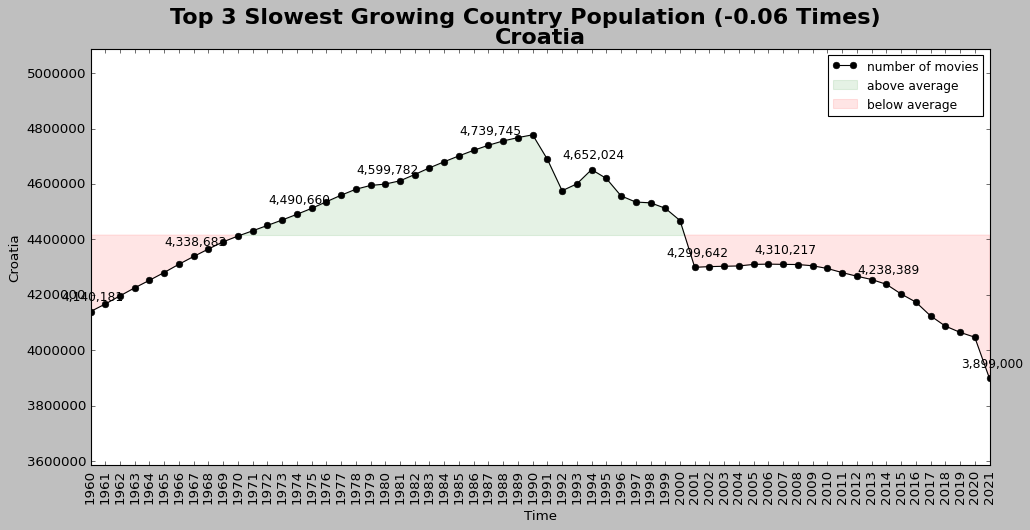

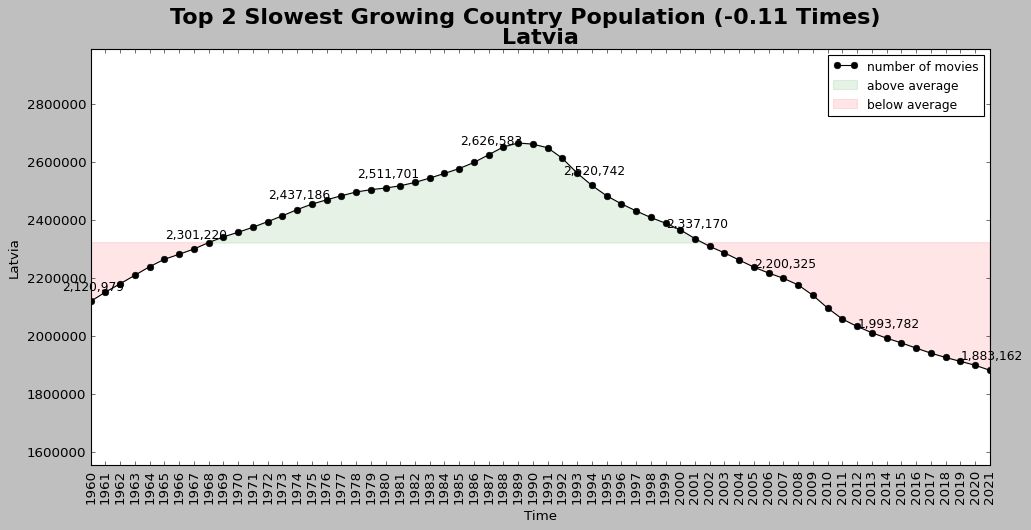

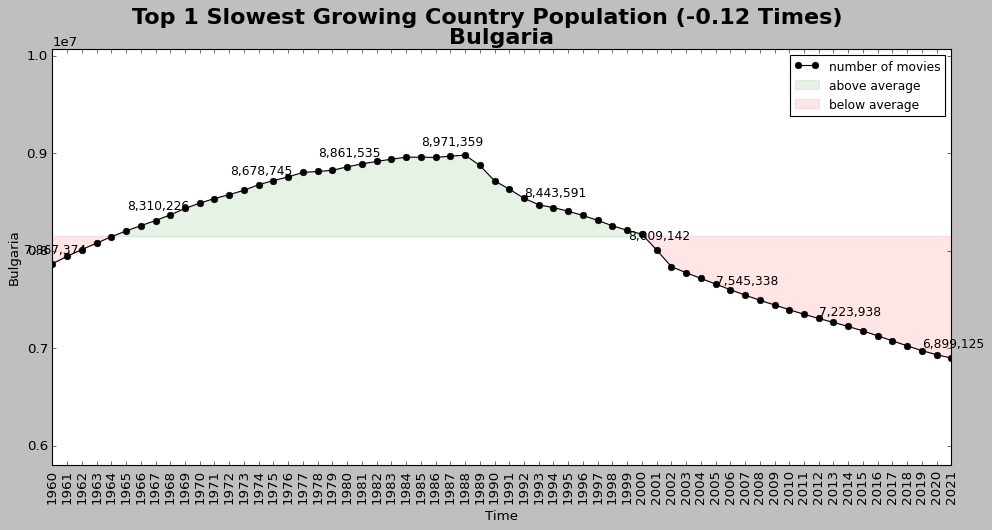

In [8]:
# Plot Top 15 Slowest Growing Population Countries
plt.style.use('classic')
date = 'date'
for target in country_below_avg:
    y = aggregate_period(df_country, 'y', date, target)
    visual(y ,date,target,f"{target}",100,1,10, scientific_annotation=False,big_title=True)

## Top 15 Slowing Growing Population Countries Since 2019 <a class="anchor" id="2.31"></a>

### The number 1 country will surprise you!

In [9]:
rank3,country_slow_2019 = get_rank(slowest_growing = True, start_2019=True)

country      rate
0                Singapore -0.043833
1                  Croatia -0.040896
2                  Moldova -0.034164
3                  Curacao -0.032215
4                   Latvia -0.016020
5                  Albania -0.014899
6                   Serbia -0.014565
7                  Romania -0.013241
8                  Ukraine -0.012878
9     Hong Kong SAR, China -0.012627
10                 Lebanon -0.012626
11  Bosnia and Herzegovina -0.011372
12                   Italy -0.011098
13                Bulgaria -0.010986
14                 Belarus -0.008434

['Belarus', 'Bulgaria', 'Italy', 'Bosnia and Herzegovina', 'Lebanon', 'Hong Kong SAR, China', 'Ukraine', 'Romania', 'Serbia', 'Albania', 'Latvia', 'Curacao', 'Moldova', 'Croatia', 'Singapore']


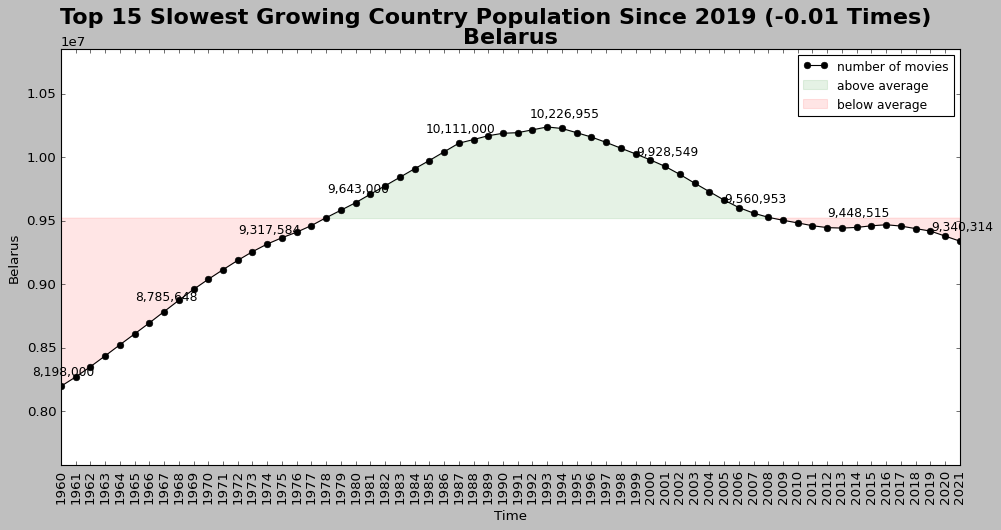

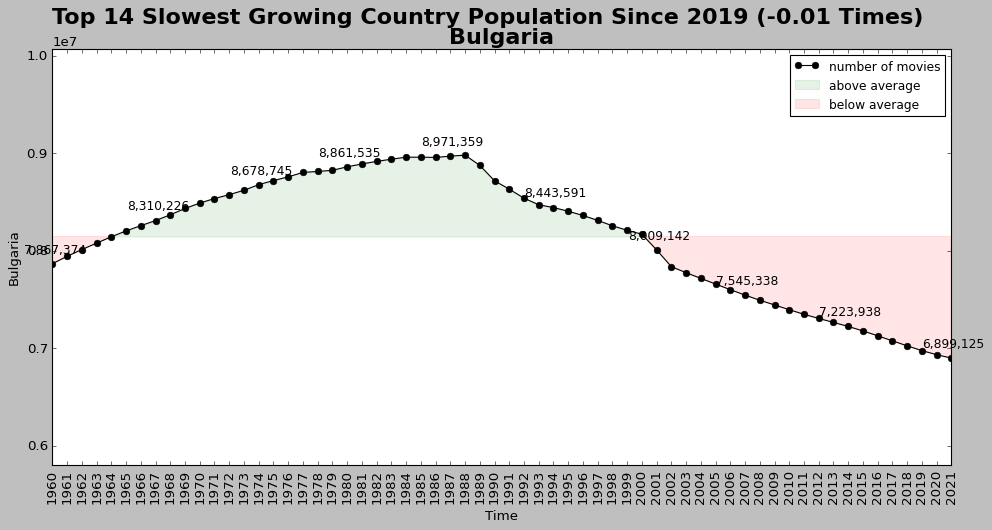

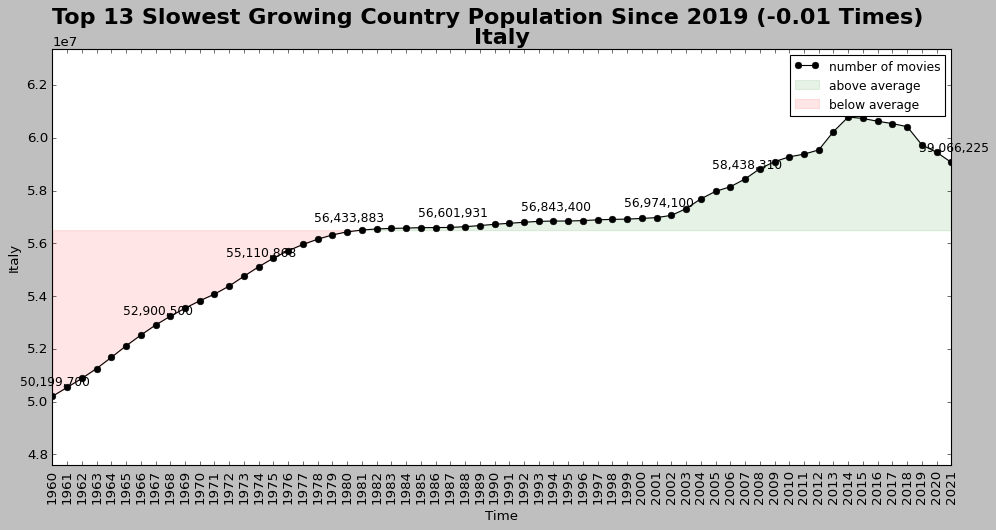

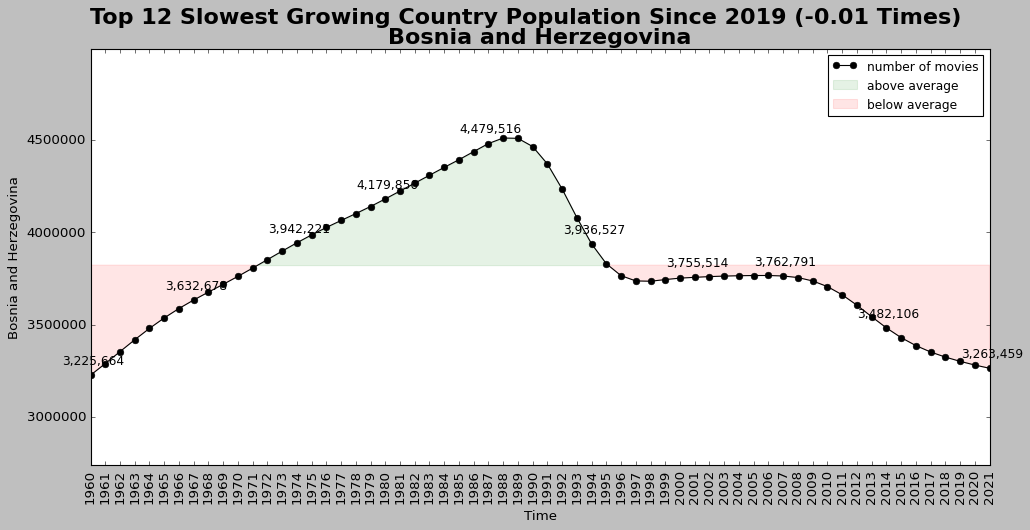

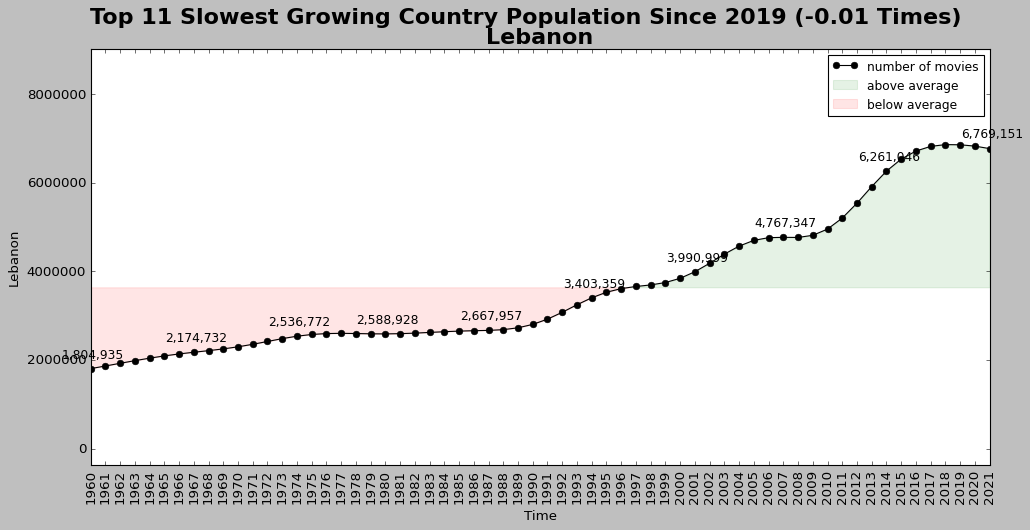

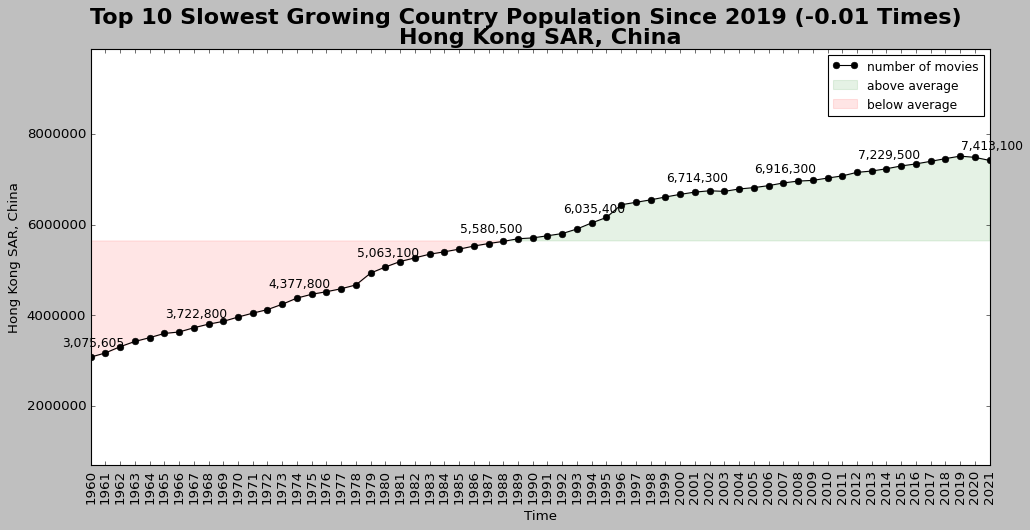

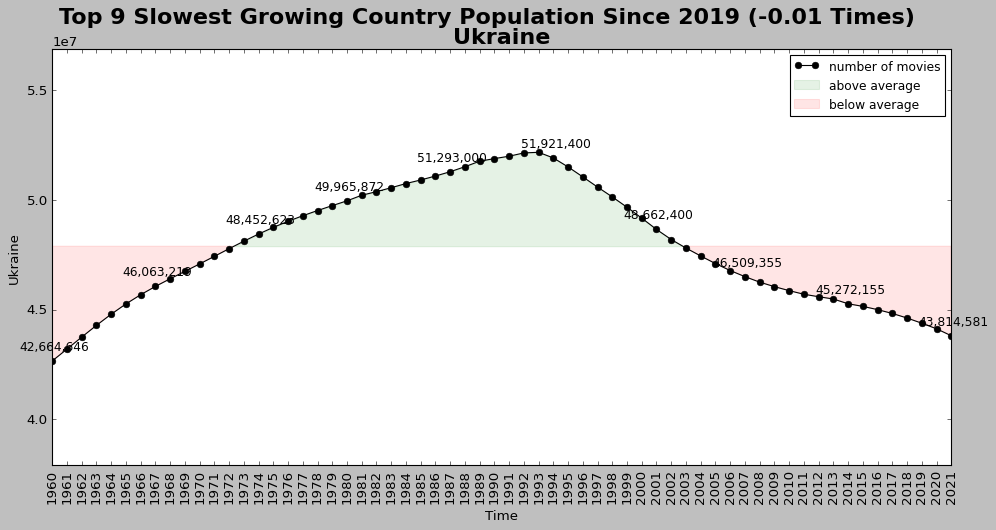

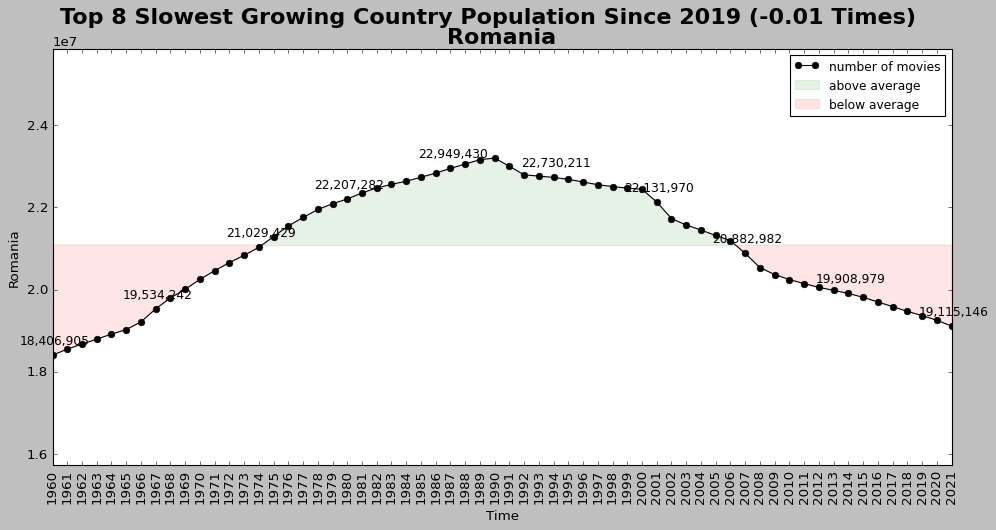

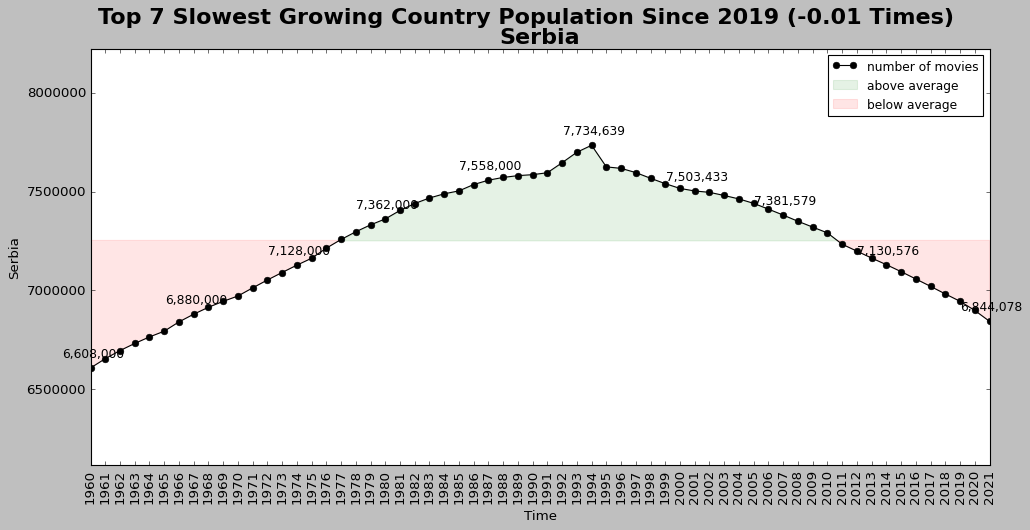

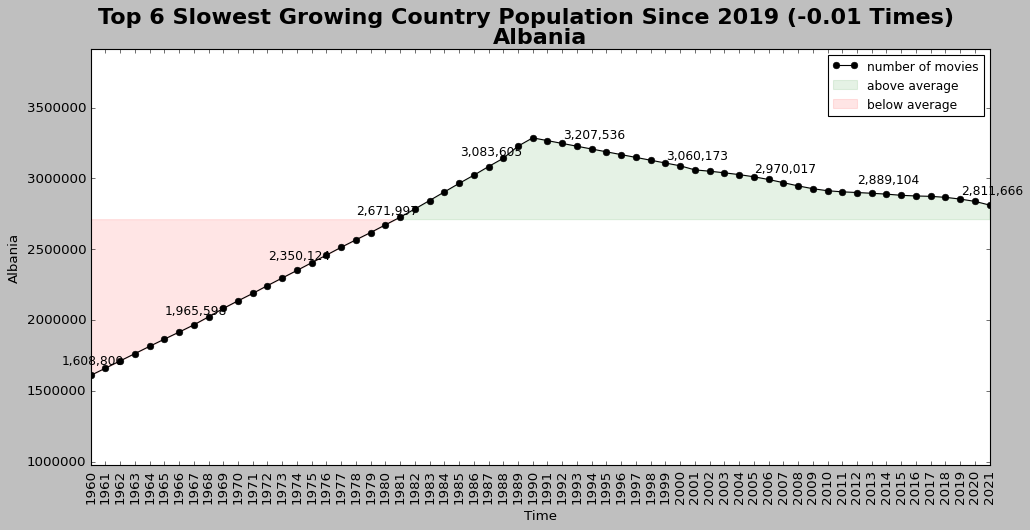

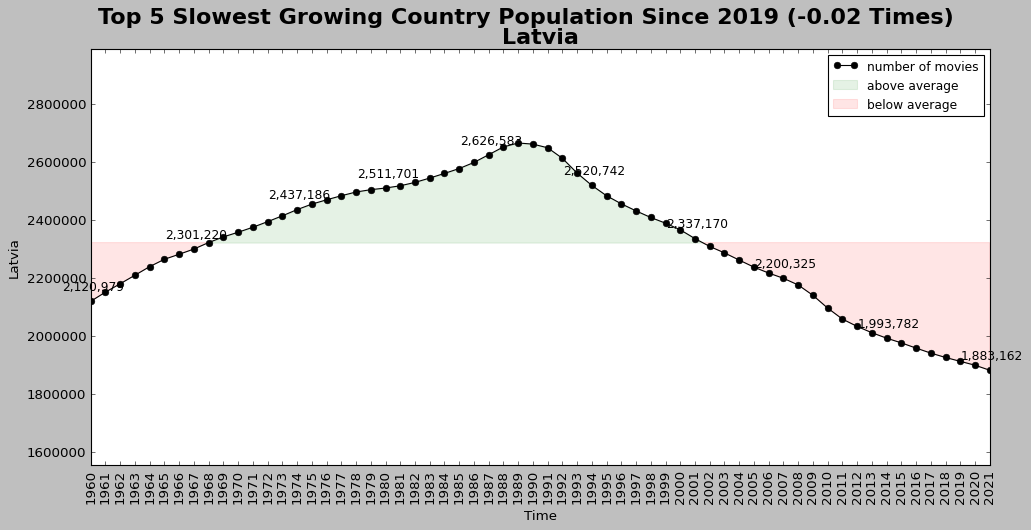

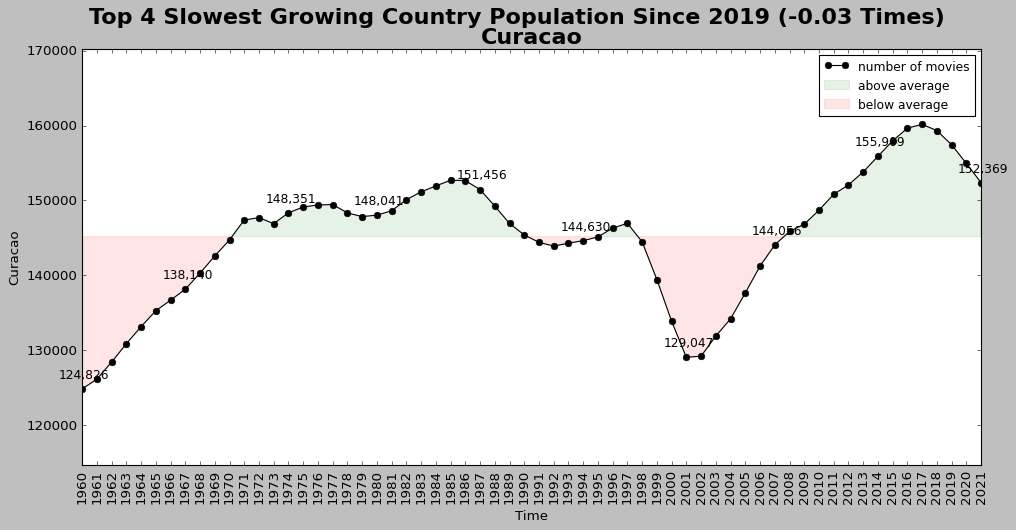

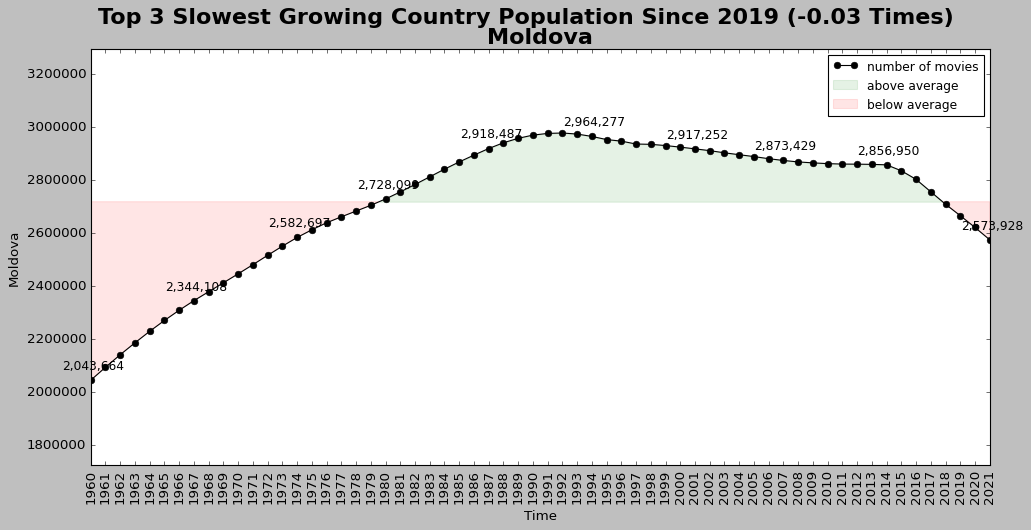

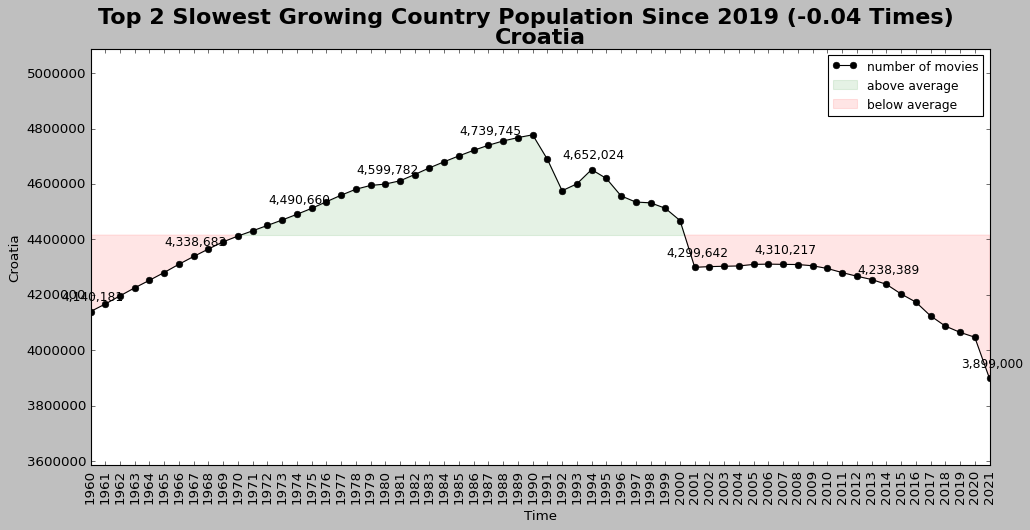

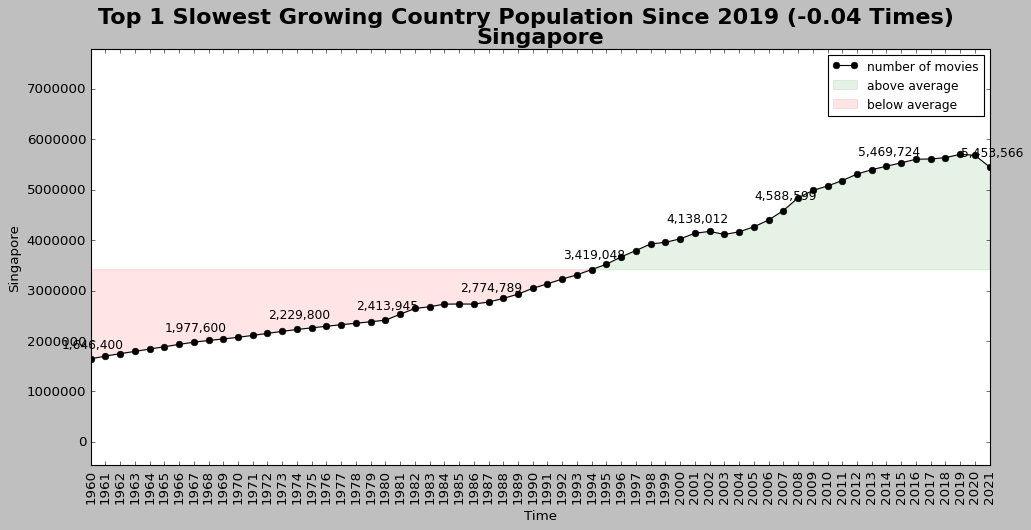

In [10]:
# Plot Top 15 Slowing Growing Population Countries Since 2019
plt.style.use('classic')
date = 'date'
for target in country_slow_2019:
    y = aggregate_period(df_country, 'y', date, target)
    visual(y ,date,target,f"{target}",100,1,10, scientific_annotation=False,big_title='slow2019')

## Visualising 50 Clusters  <a class="anchor" id="2.4"></a>

Anomalies: Central Europe and the Baltics

World


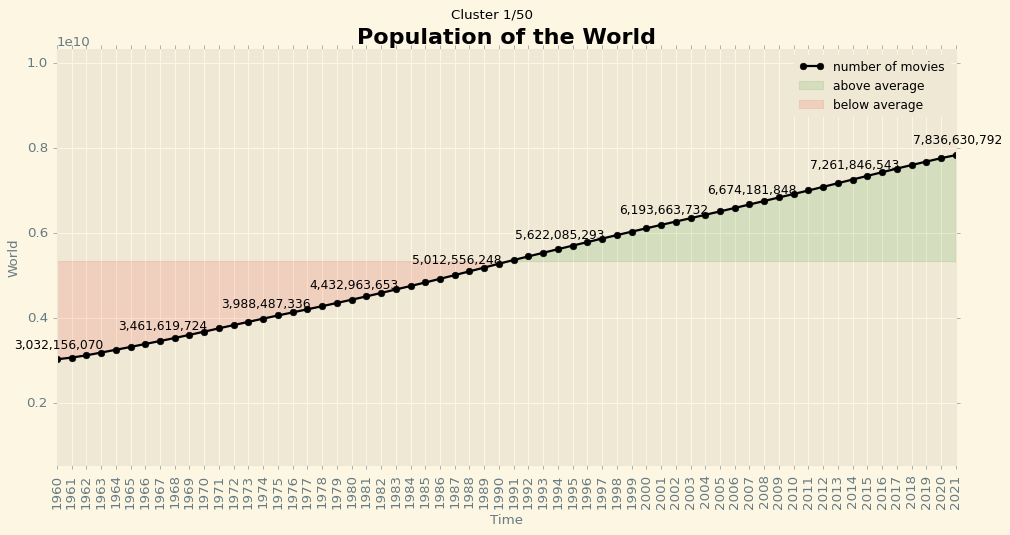

IDA & IBRD total


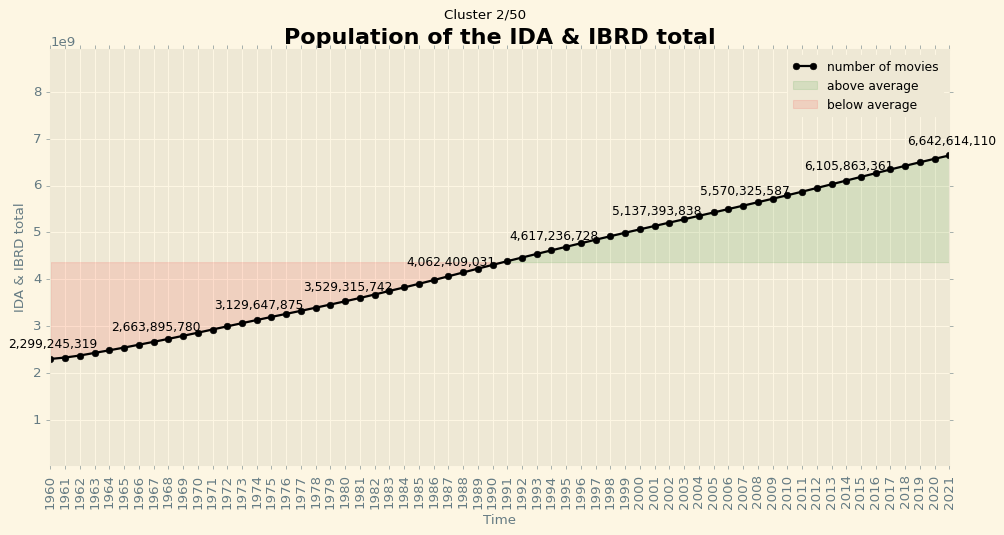

Low & middle income


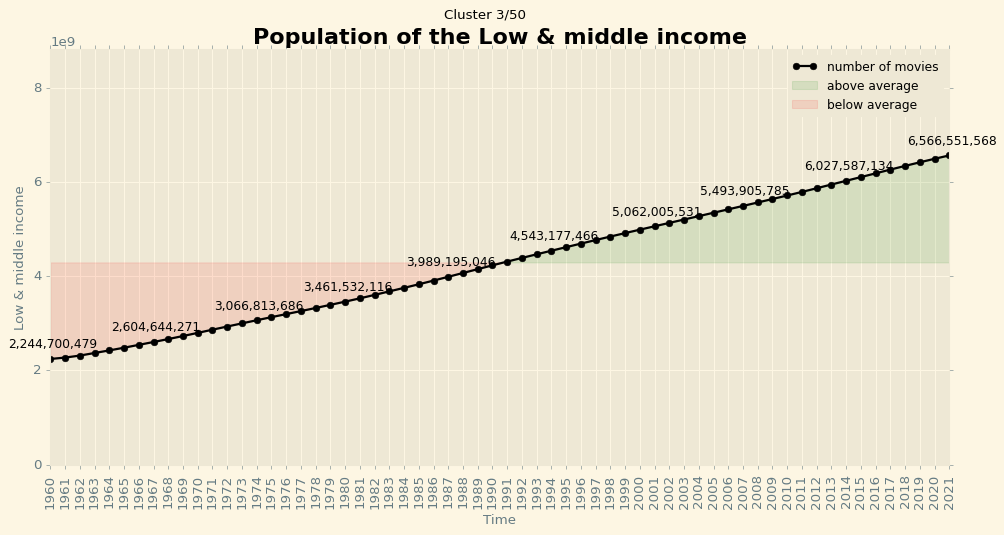

Middle income


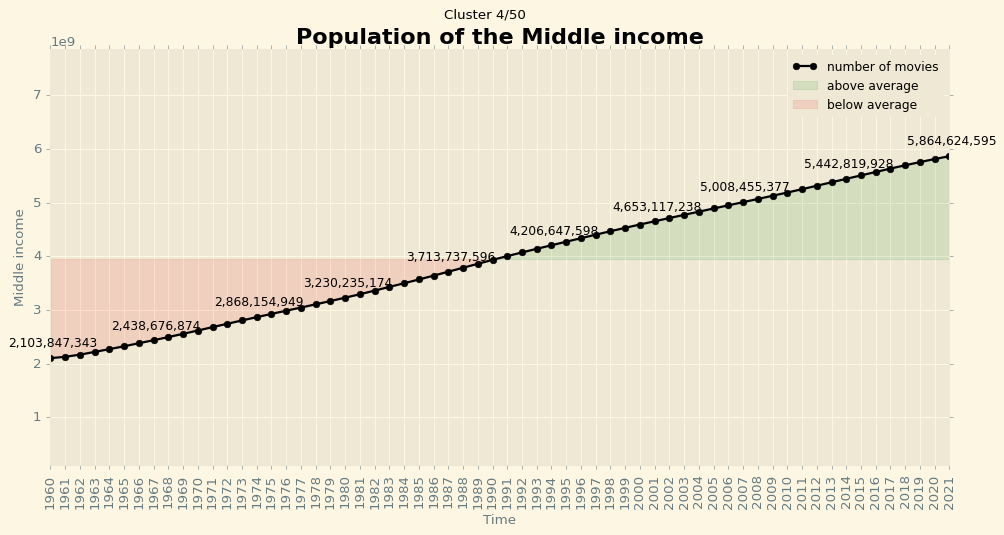

IBRD only


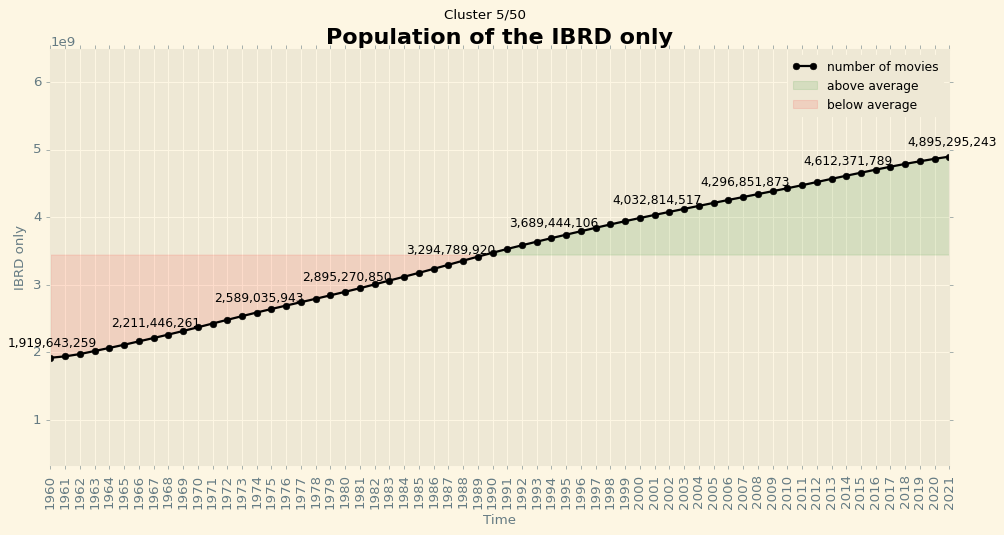

Early-demographic dividend


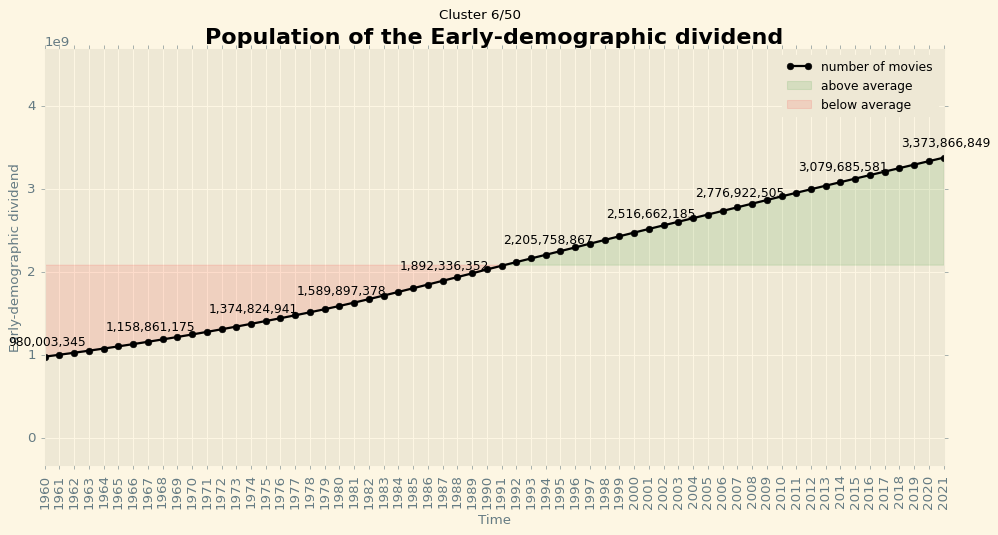

Lower middle income


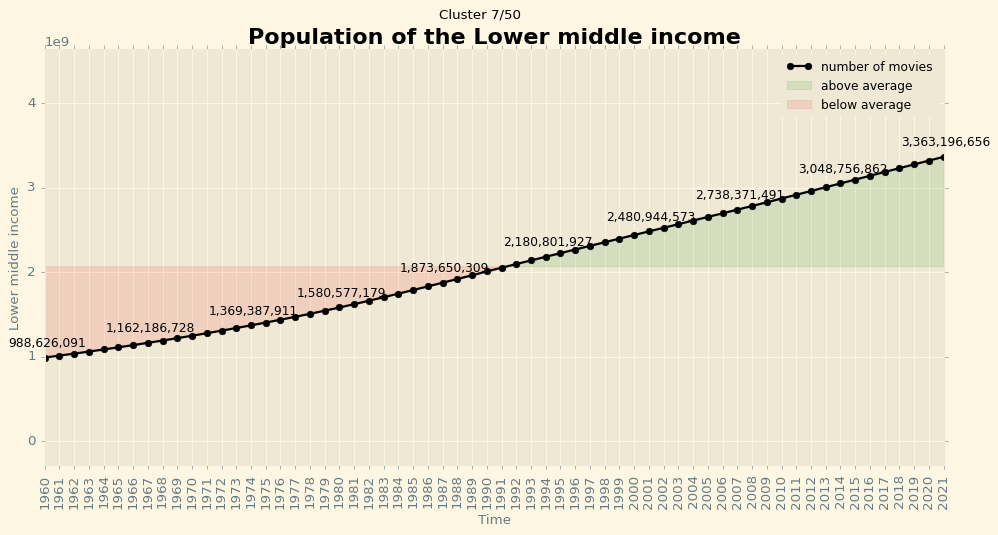

Upper middle income


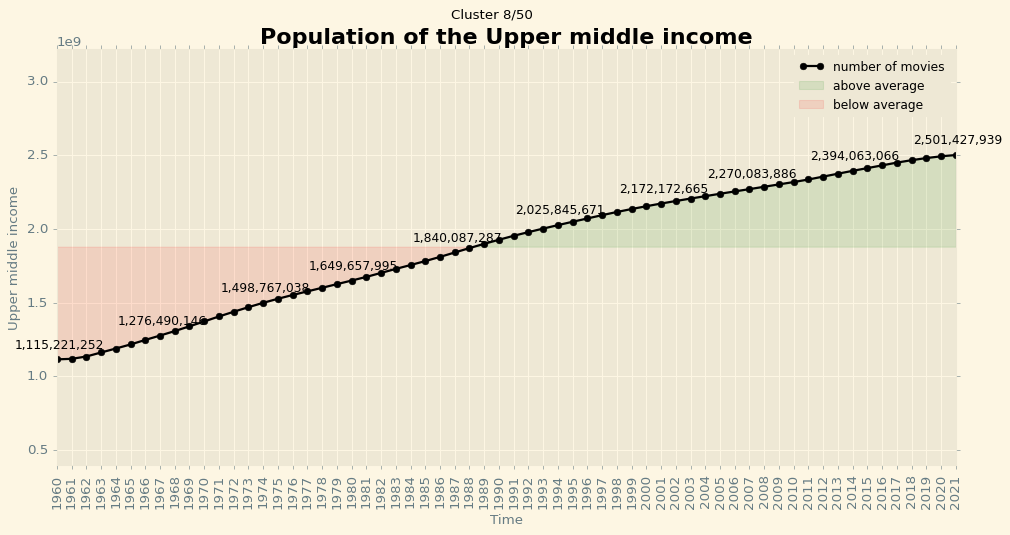

East Asia & Pacific


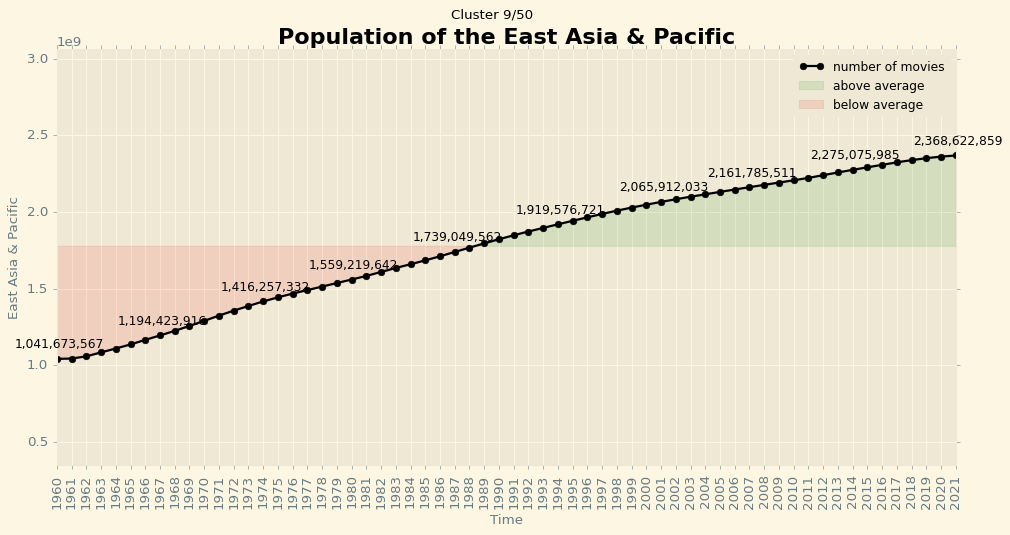

Late-demographic dividend


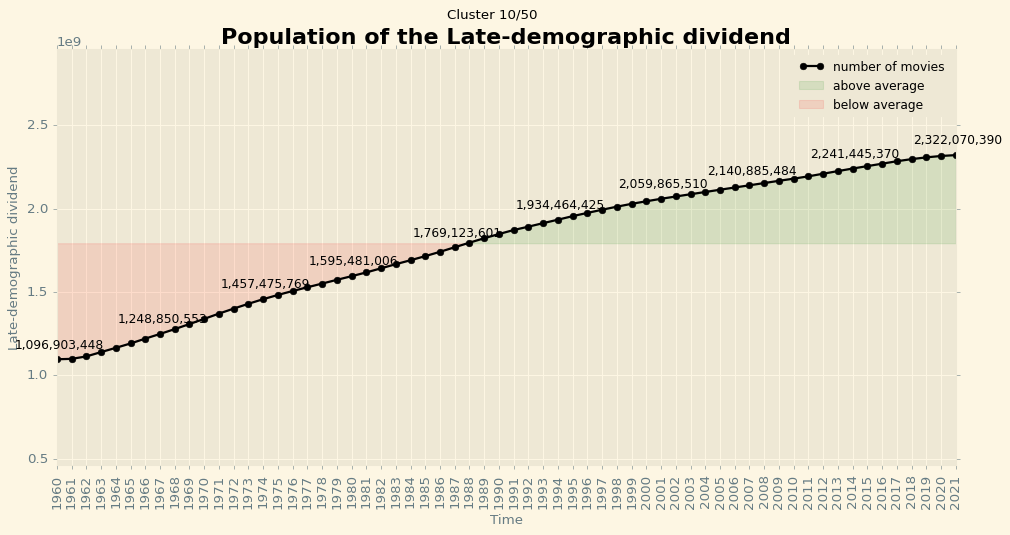

East Asia & Pacific (excluding high income)


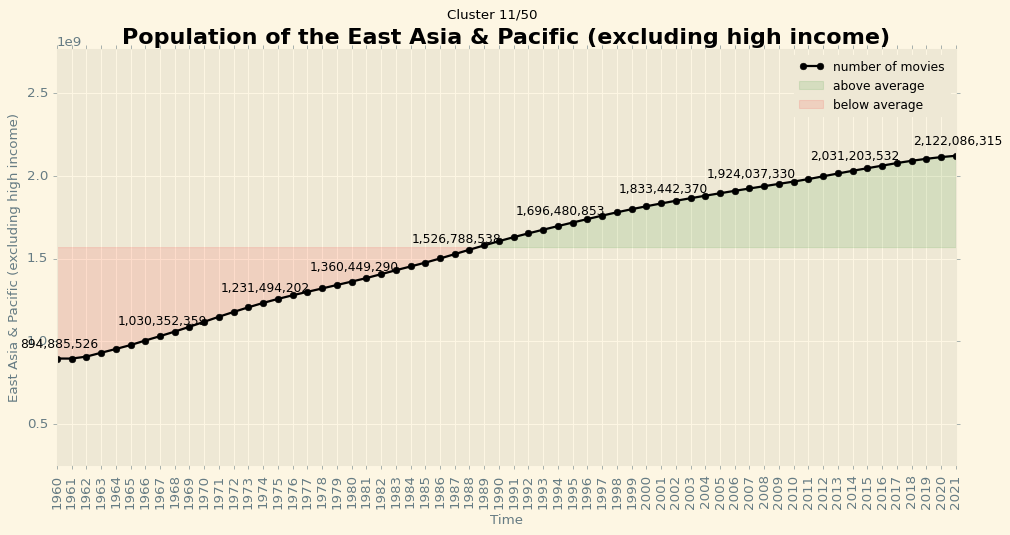

East Asia & Pacific (IDA & IBRD countries)


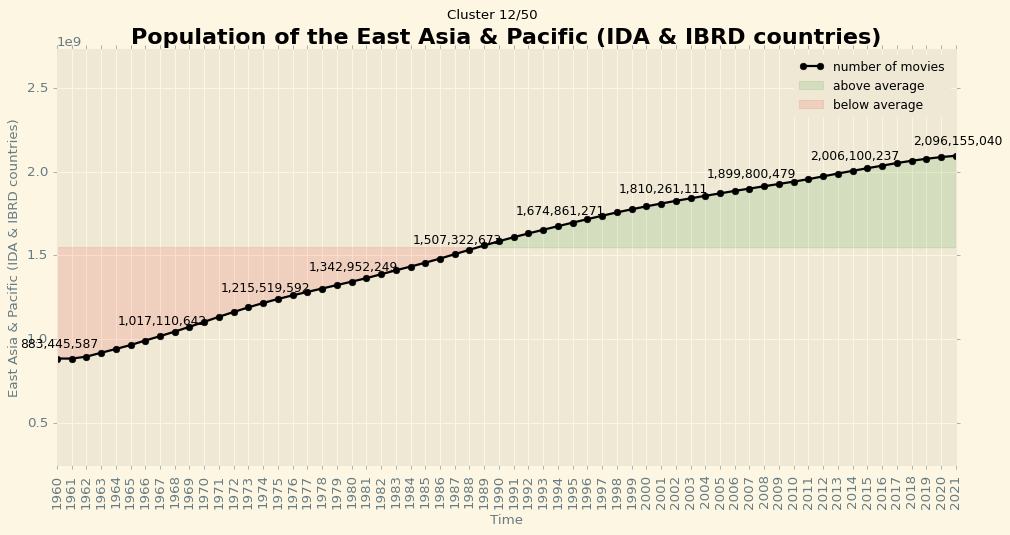

South Asia (IDA & IBRD)


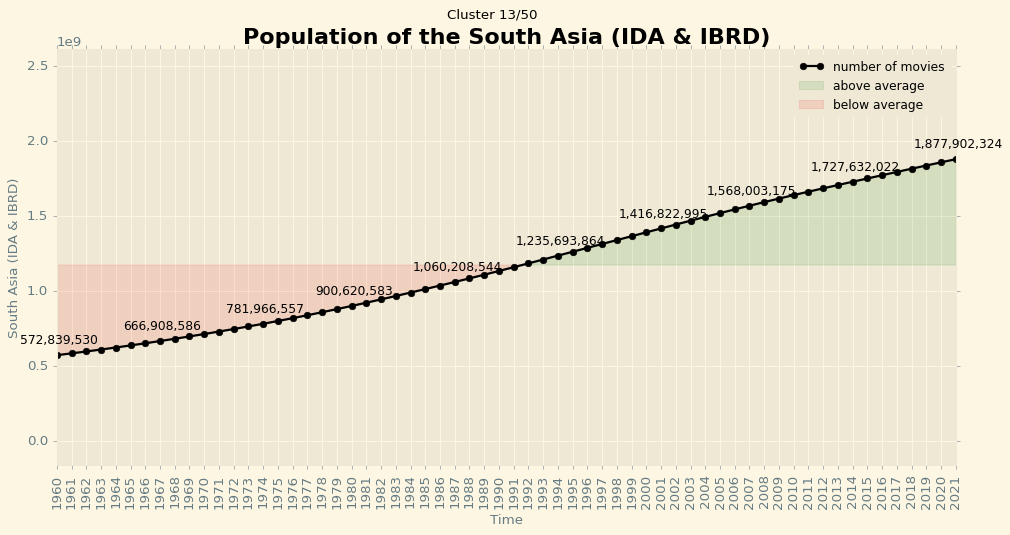

South Asia


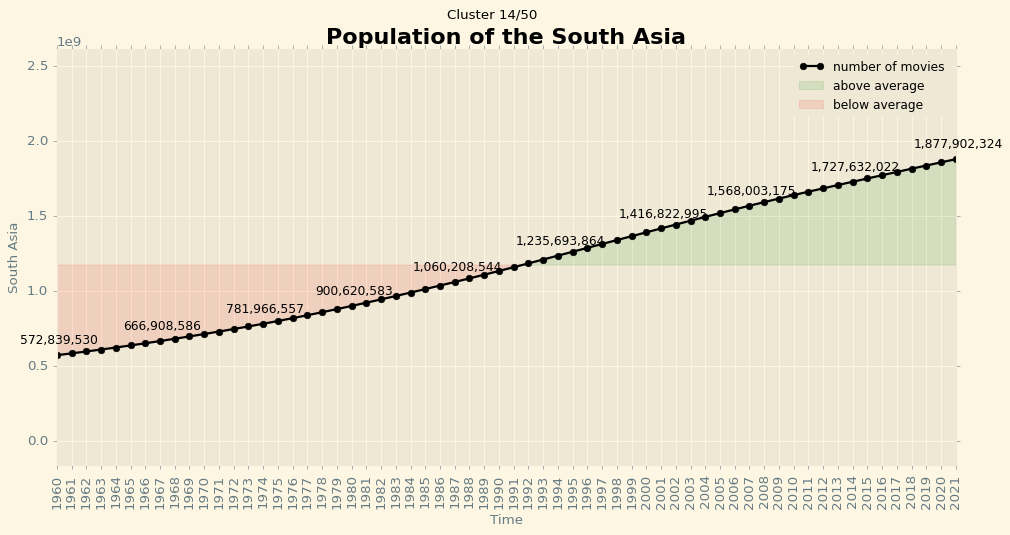

IDA total


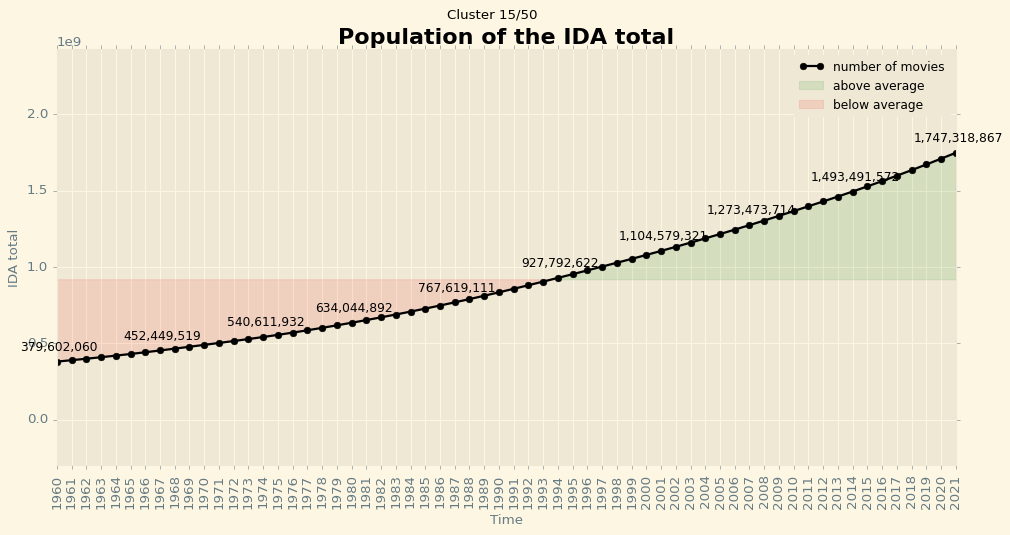

OECD members


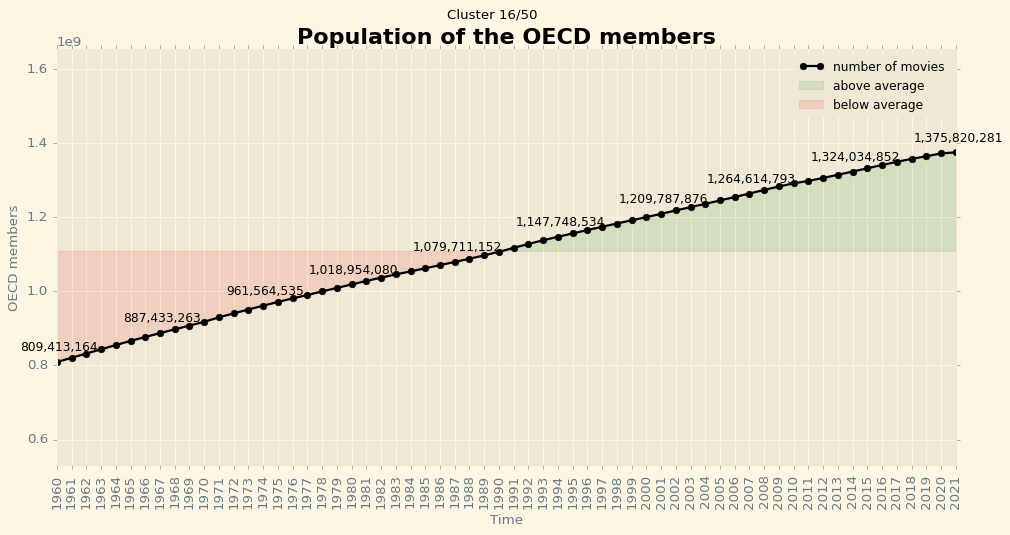

High income


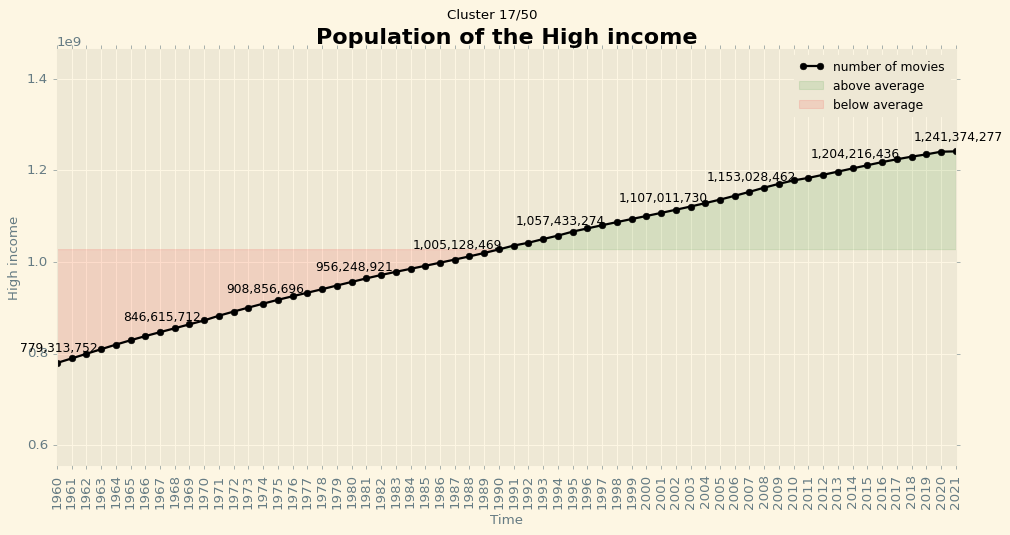

Sub-Saharan Africa (IDA & IBRD countries)


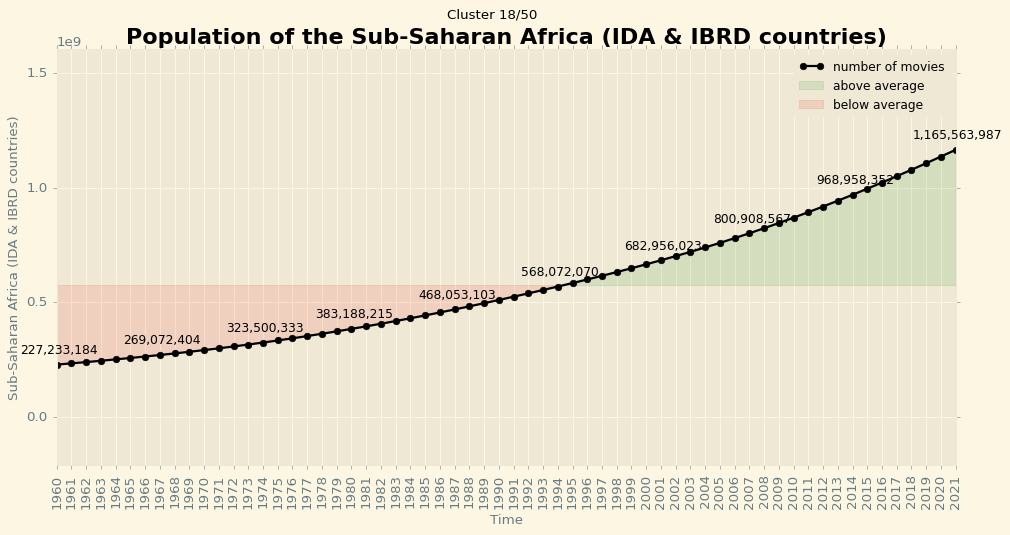

Sub-Saharan Africa


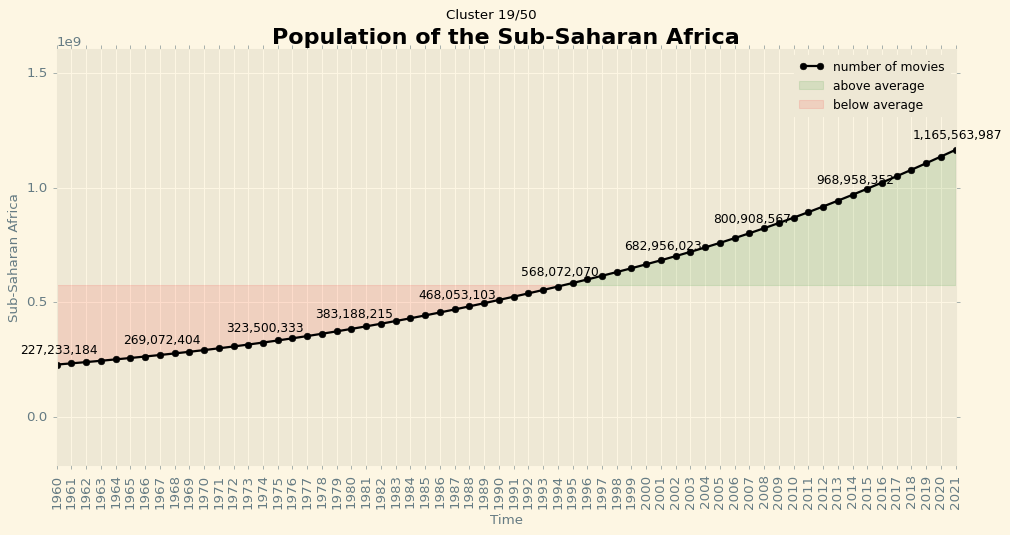

Sub-Saharan Africa (excluding high income)


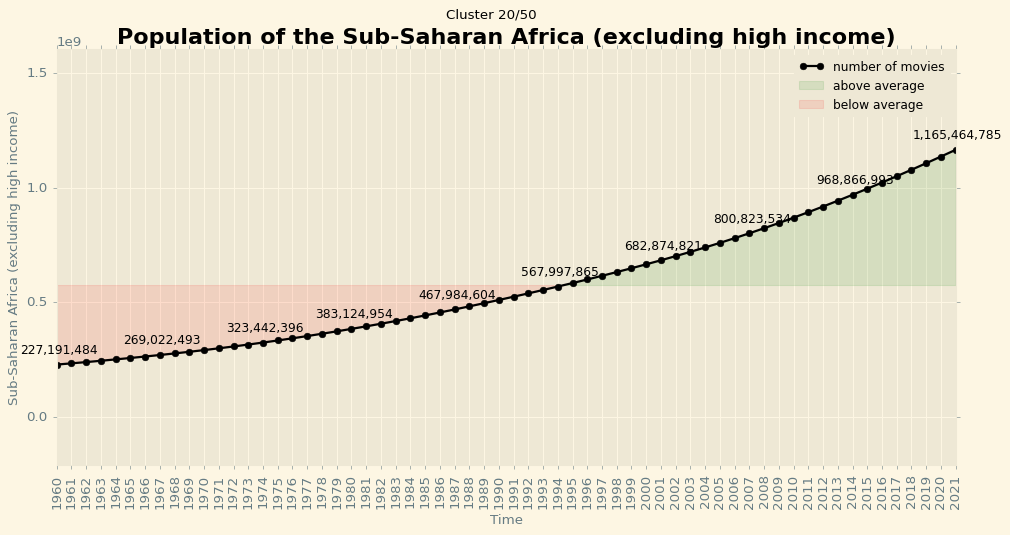

IDA only


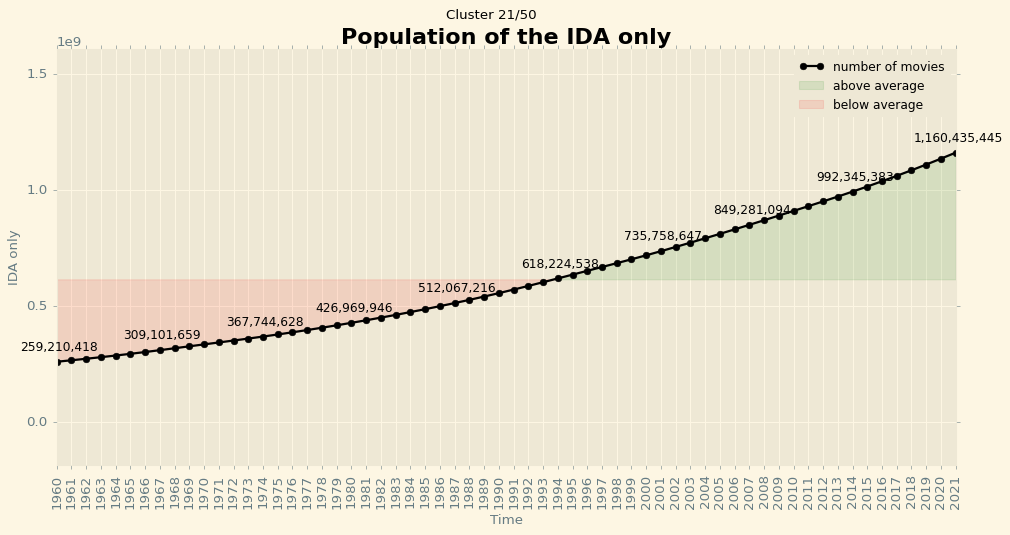

Post-demographic dividend


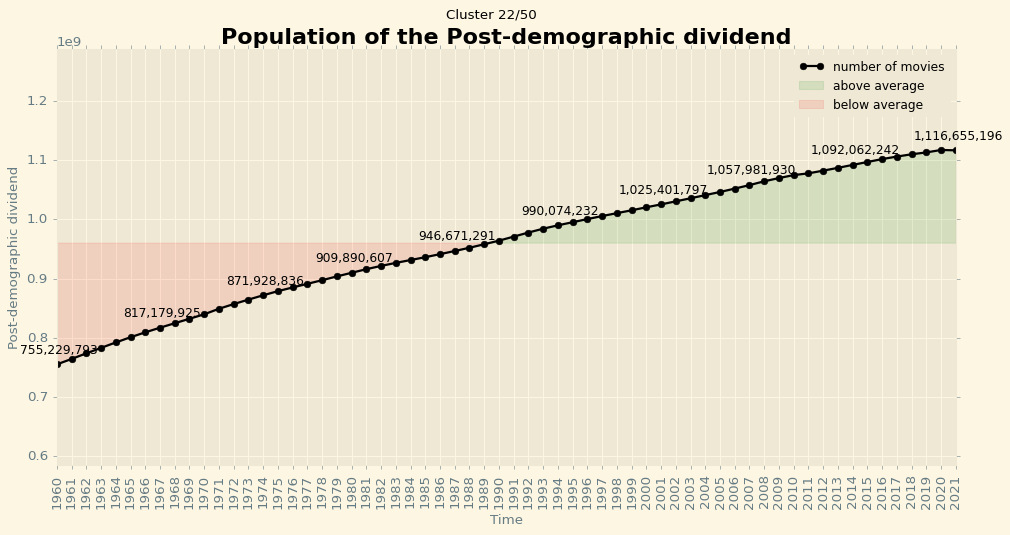

Least developed countries: UN classification


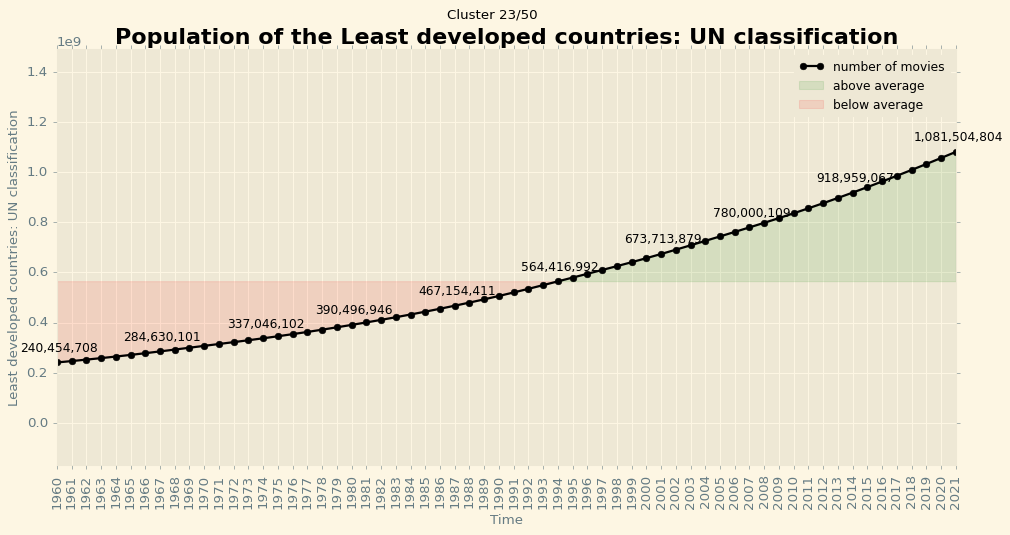

Pre-demographic dividend


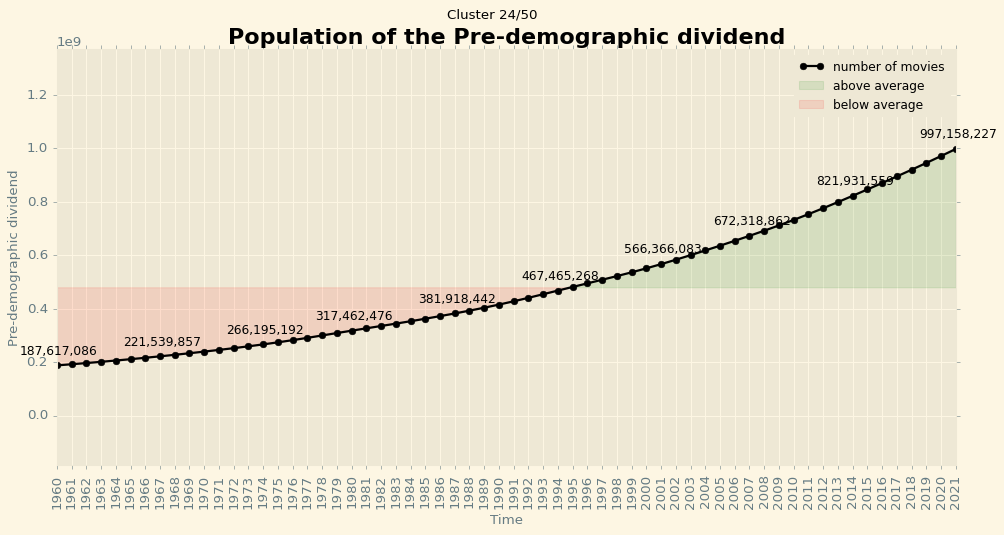

Fragile and conflict affected situations


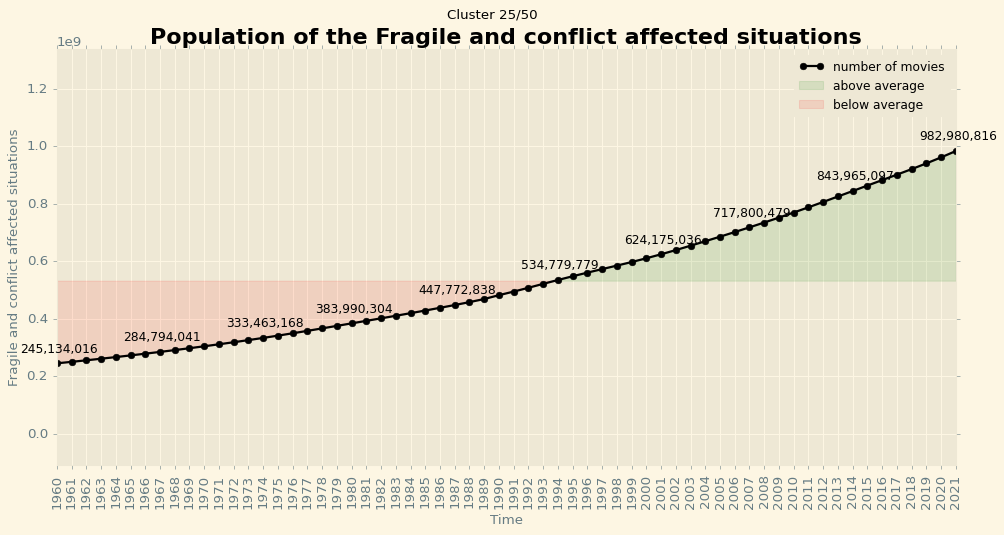

Europe & Central Asia


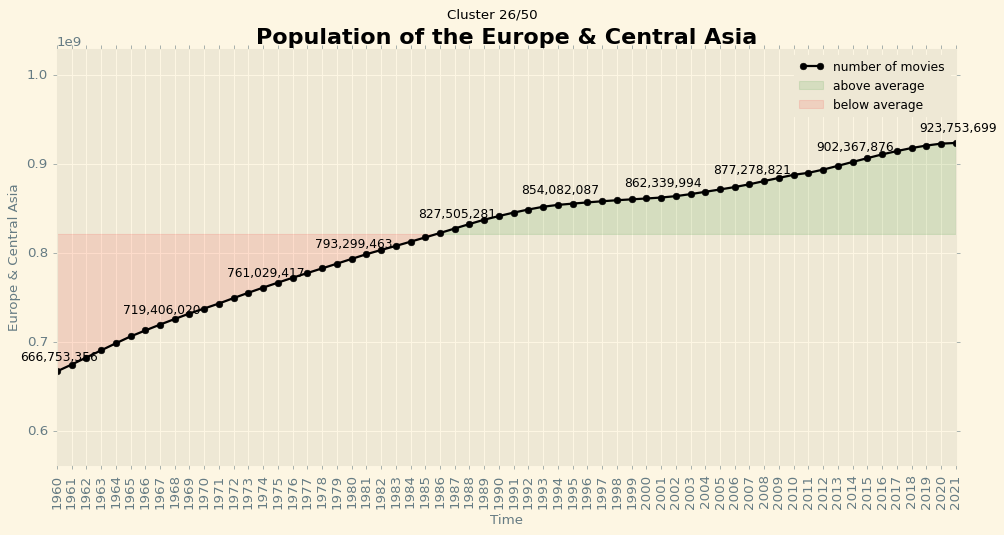

Heavily indebted poor countries (HIPC)


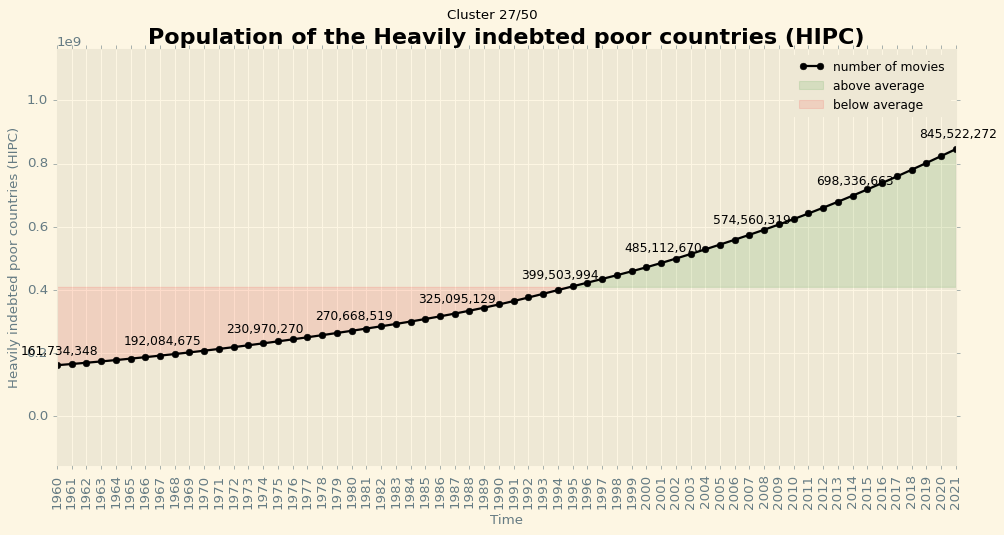

Low income


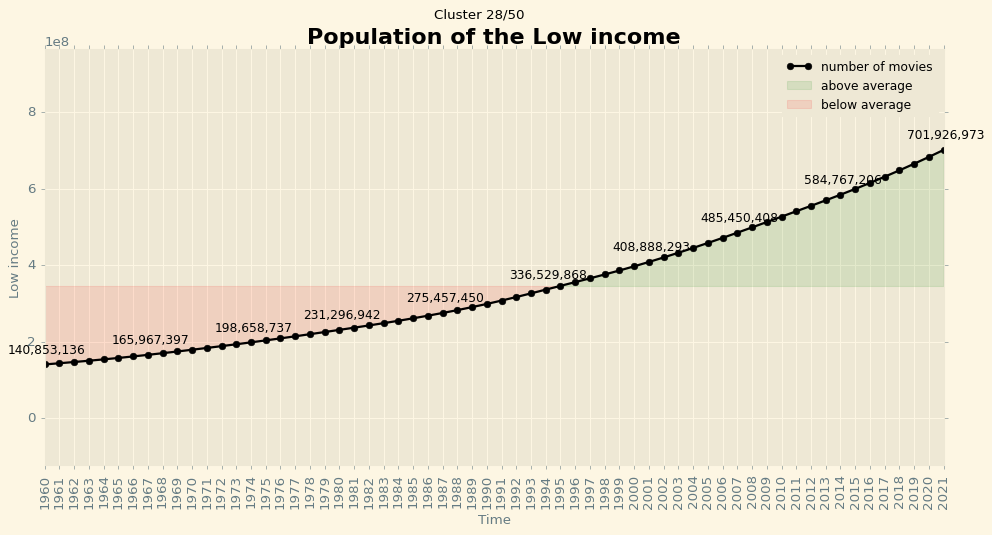

Africa Eastern and Southern


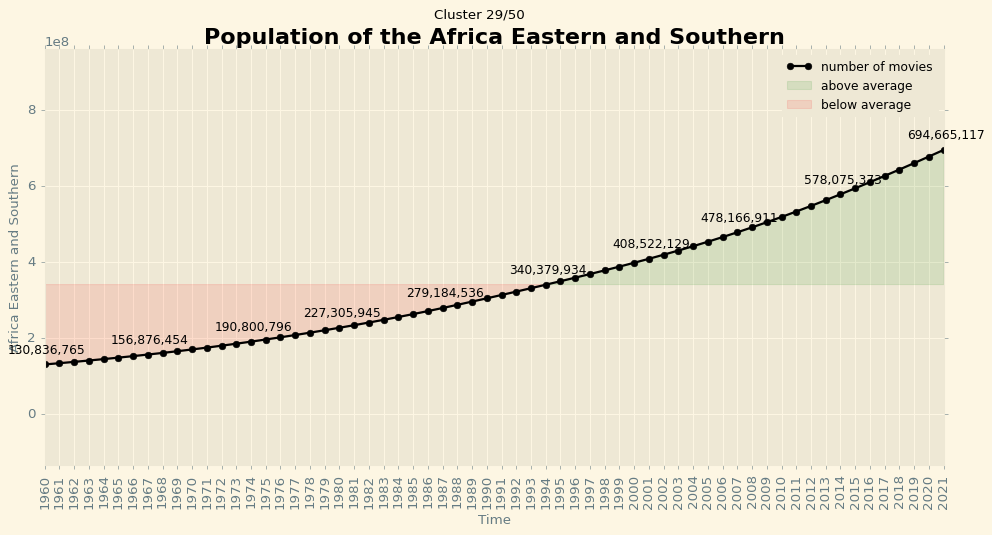

Latin America & Caribbean


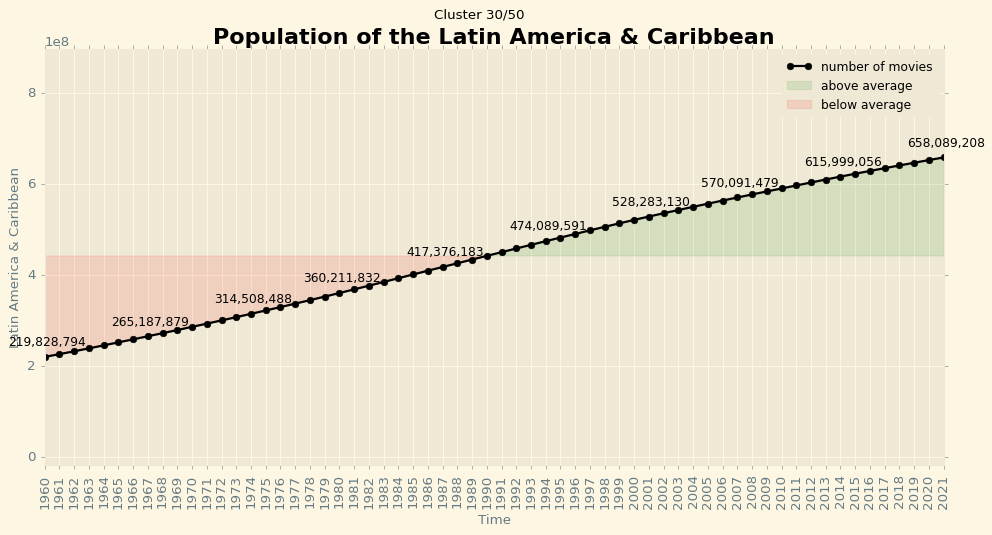

Latin America & the Caribbean (IDA & IBRD countries)


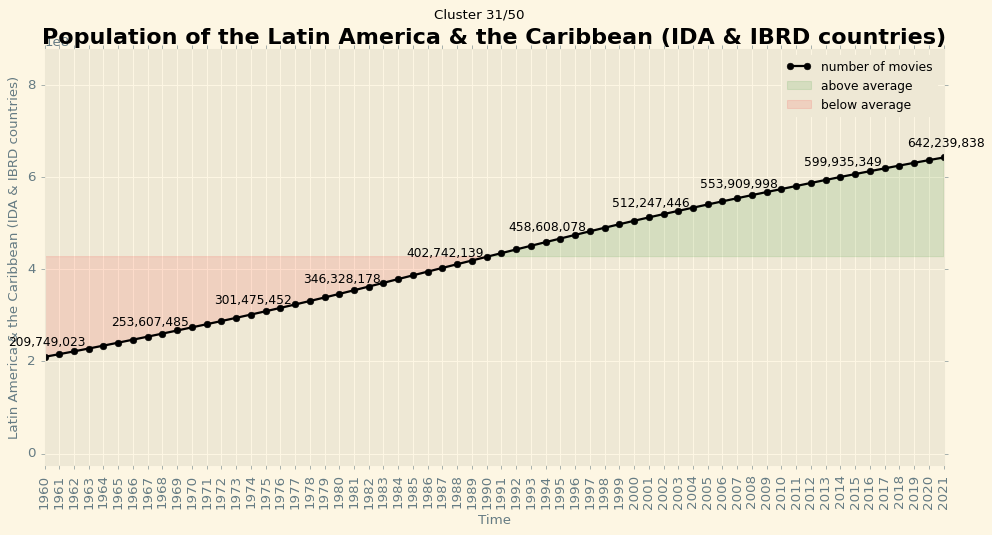

Latin America & Caribbean (excluding high income)


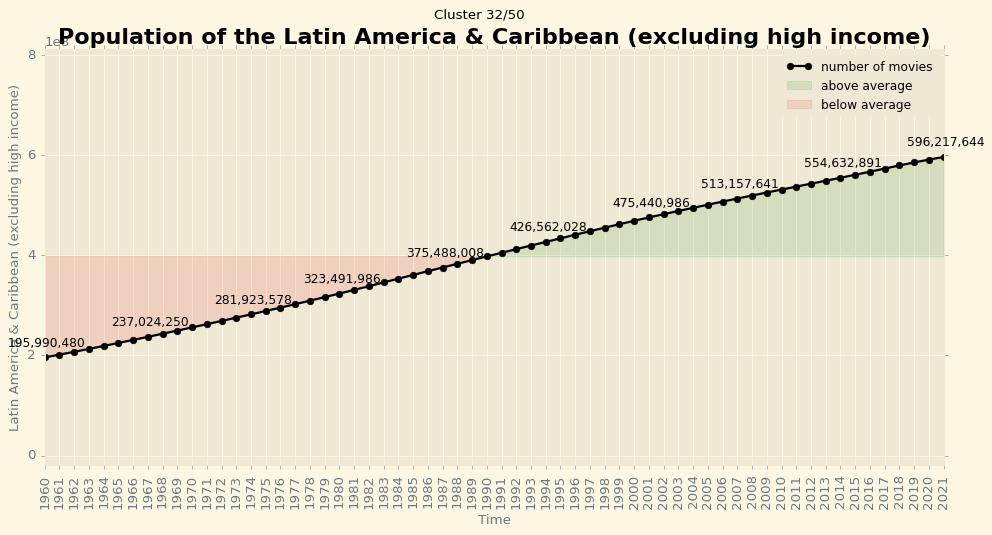

IDA blend


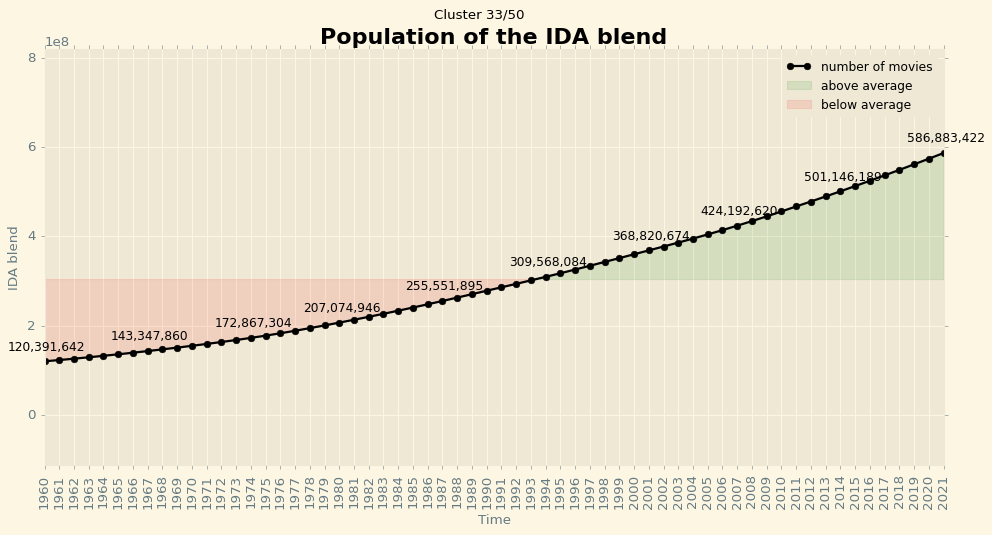

Middle East & North Africa


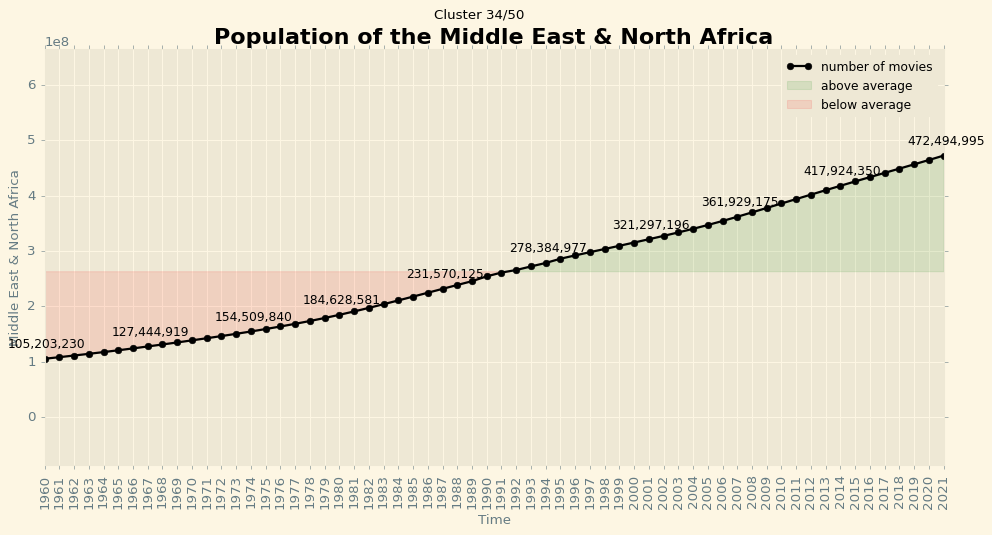

Africa Western and Central


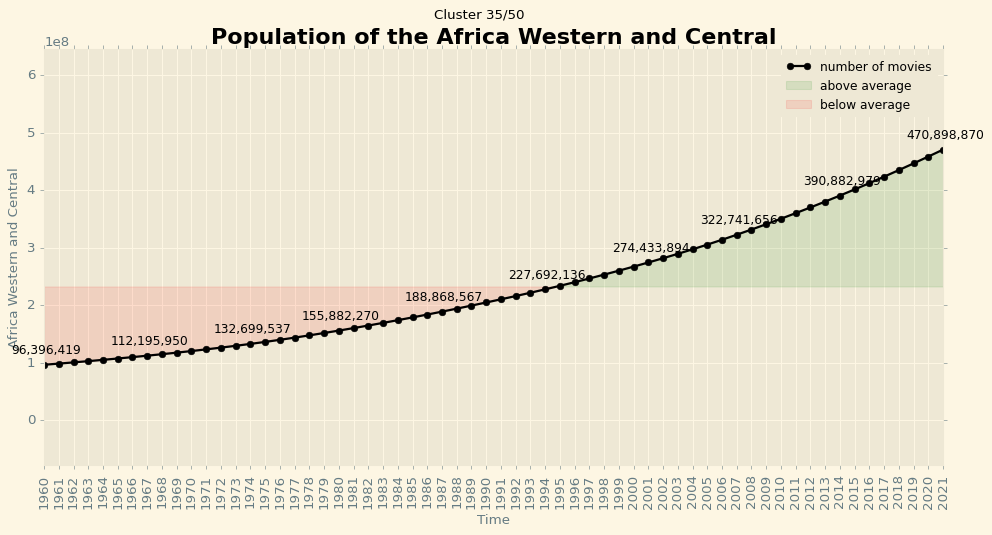

Europe & Central Asia (IDA & IBRD countries)


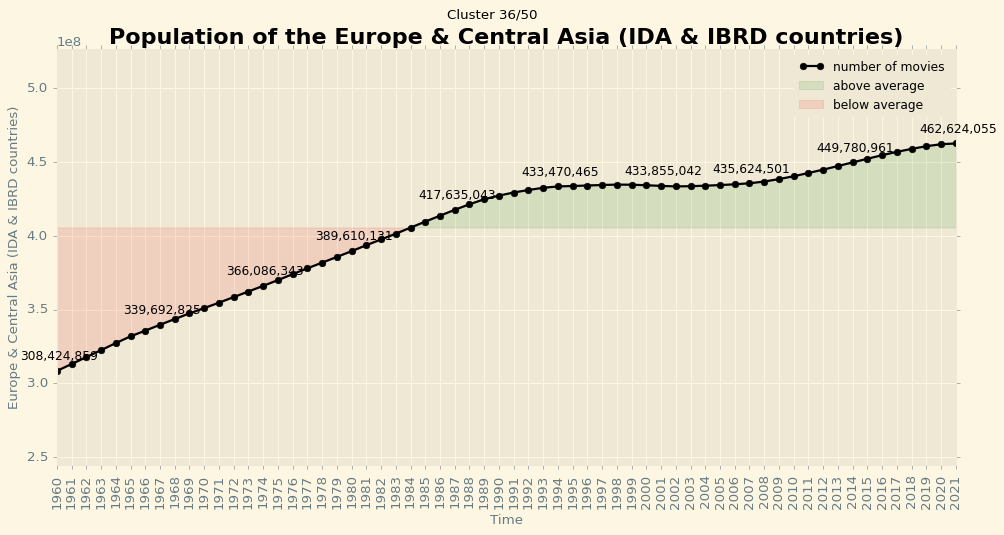

European Union


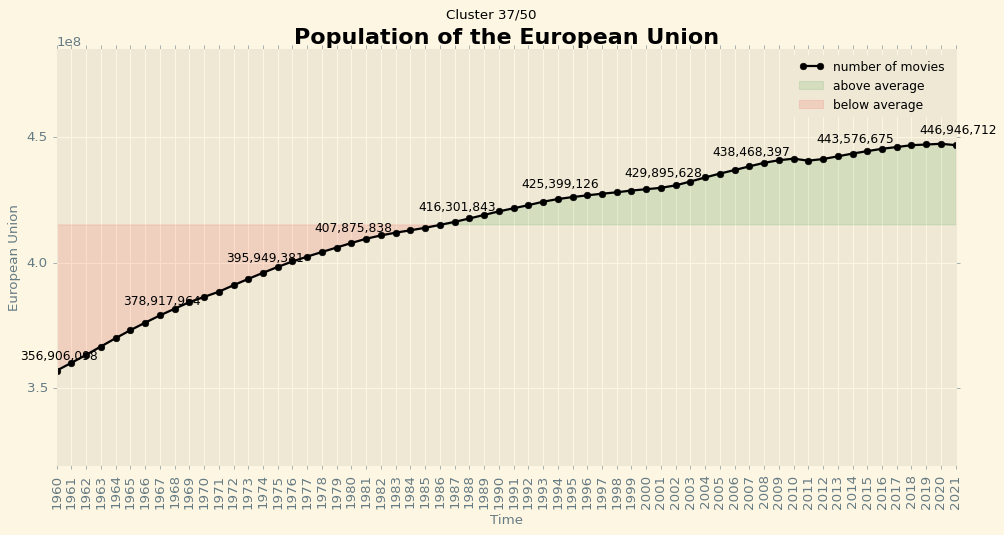

Arab World


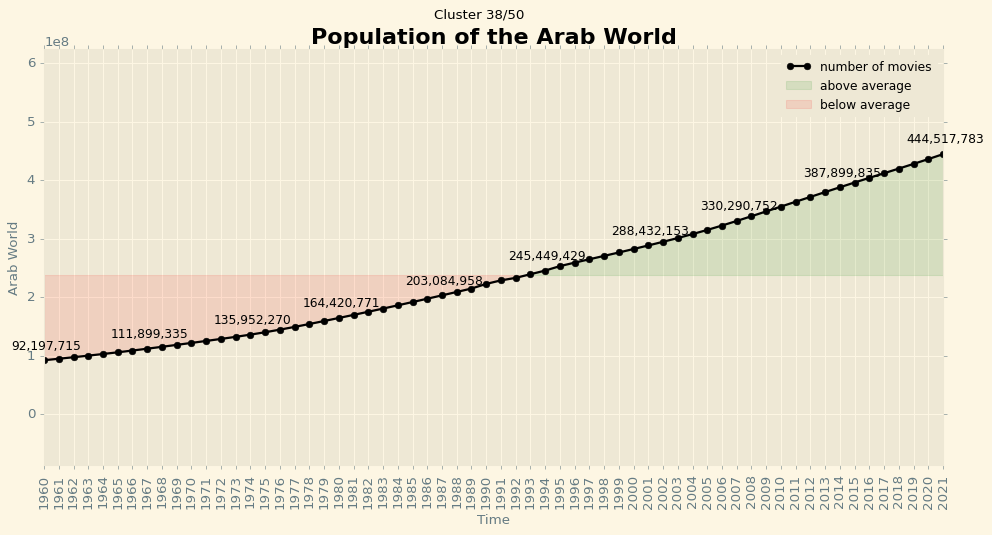

Middle East & North Africa (excluding high income)


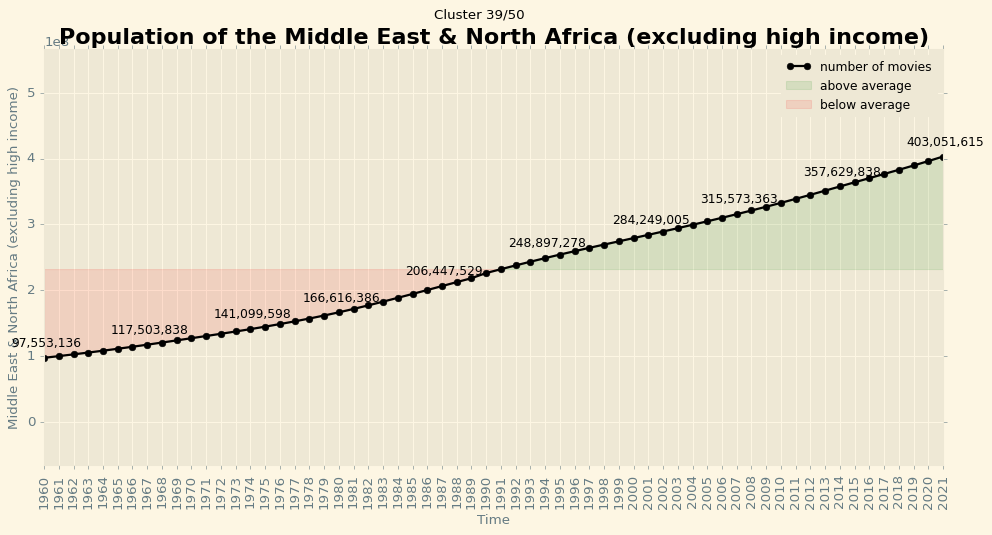

Europe & Central Asia (excluding high income)


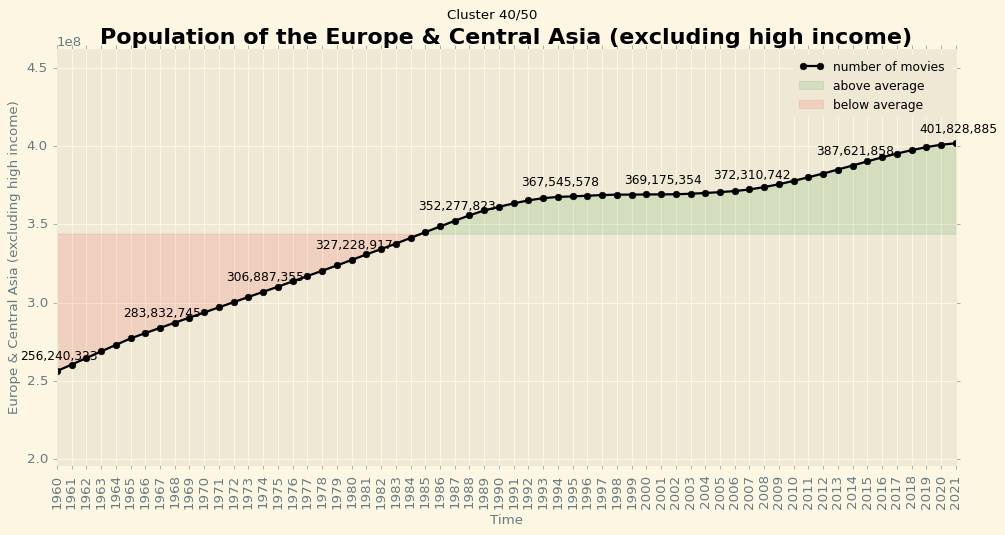

Middle East & North Africa (IDA & IBRD countries)


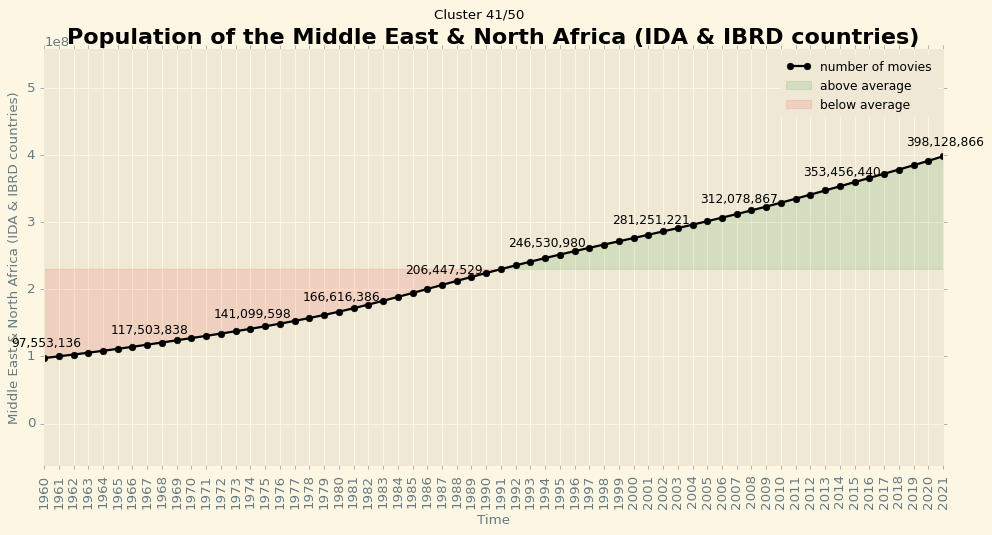

North America


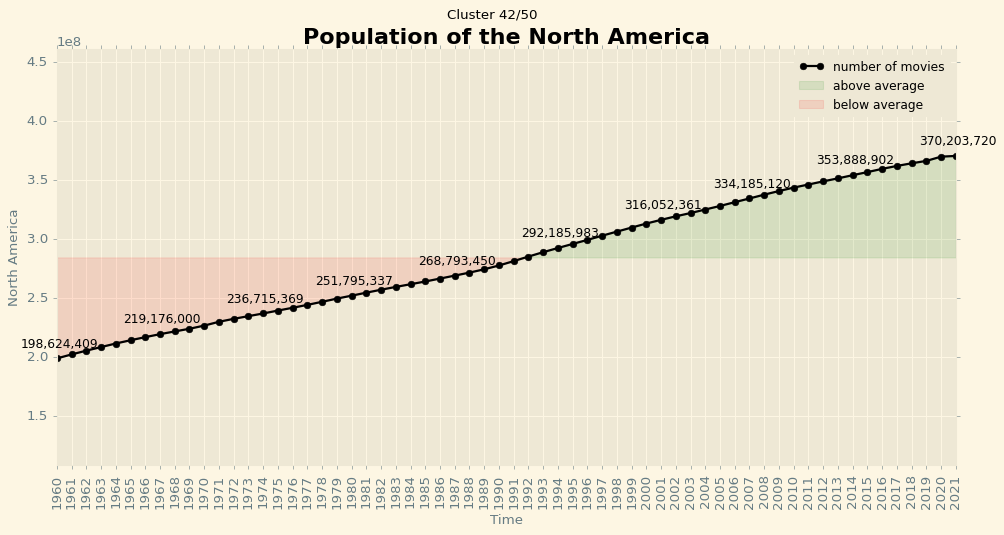

Euro area


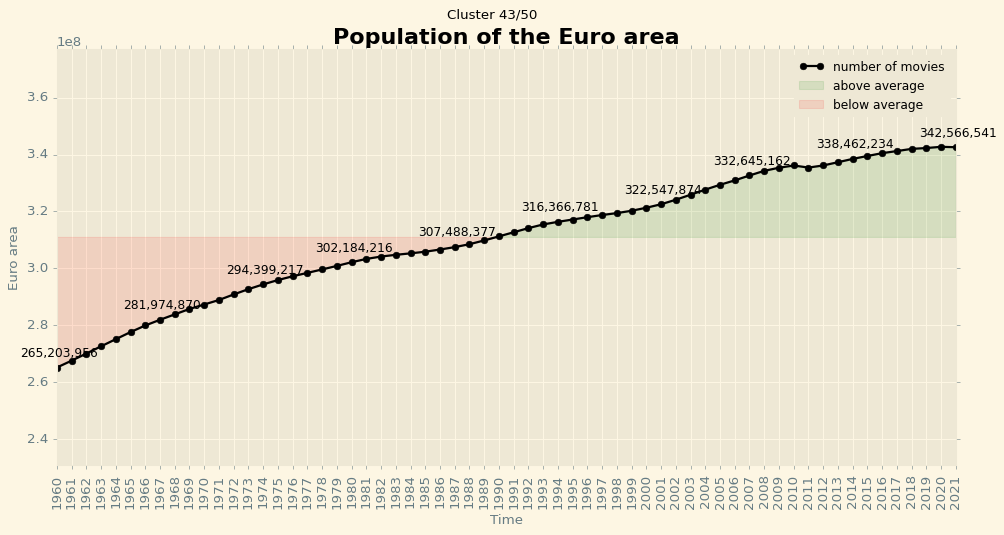

Central Europe and the Baltics


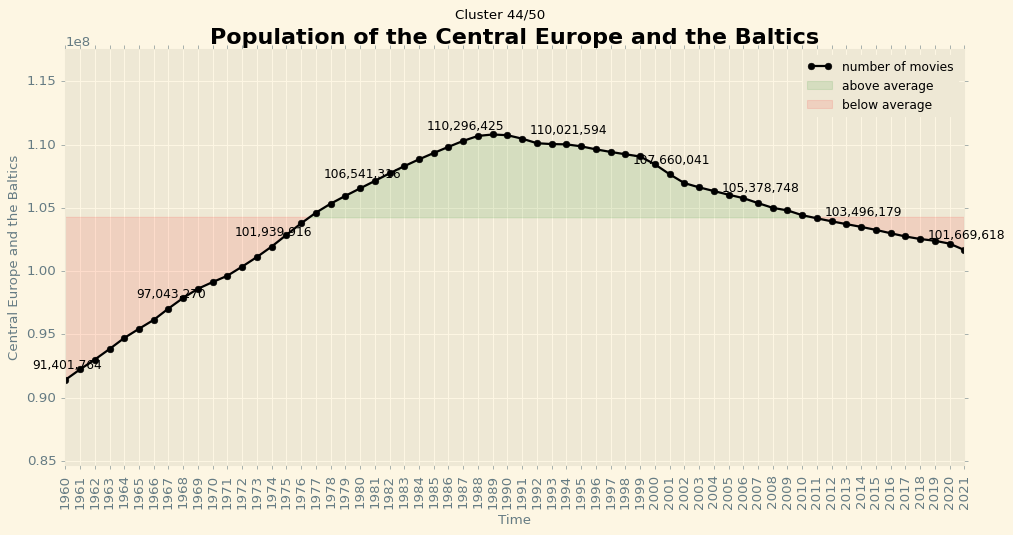

Small states


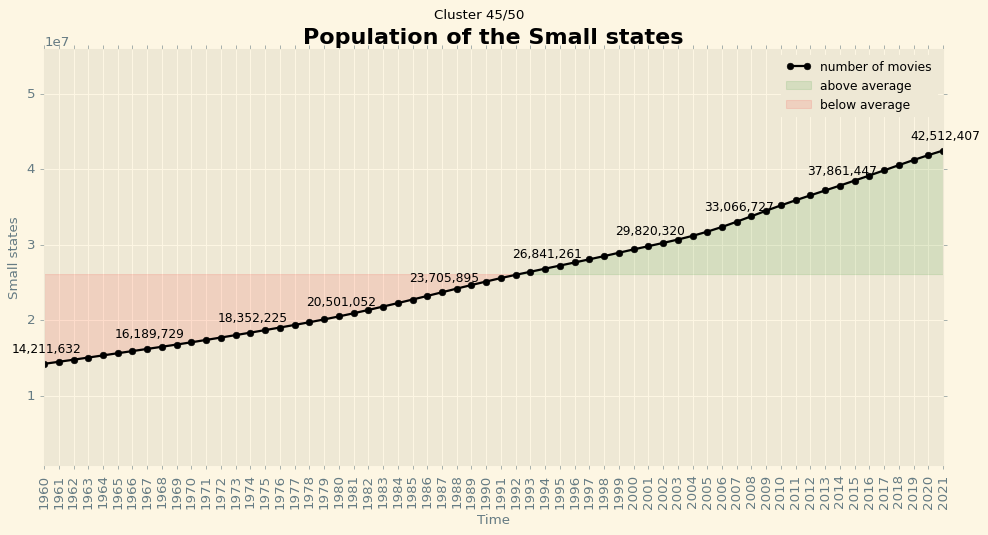

Other small states


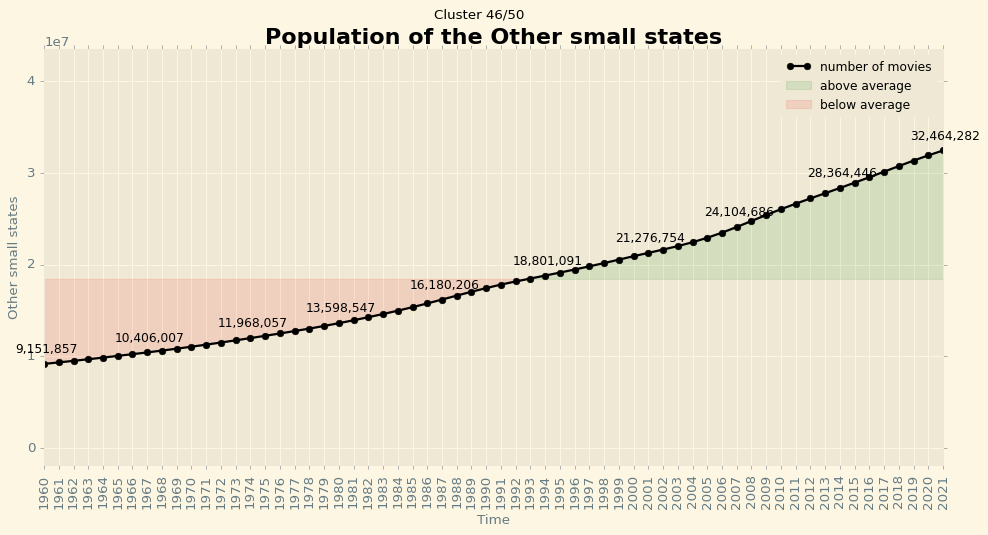

Caribbean small states


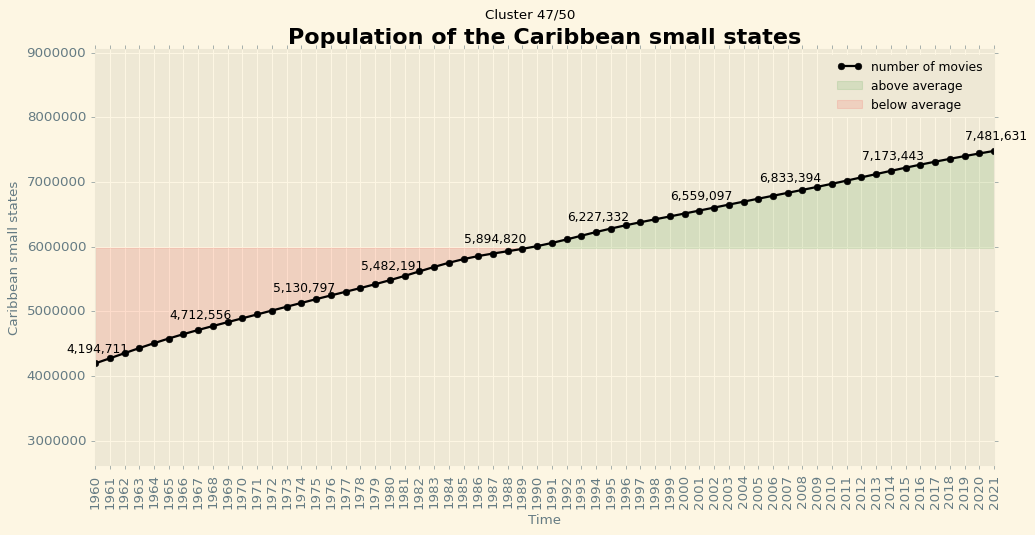

Pacific island small states


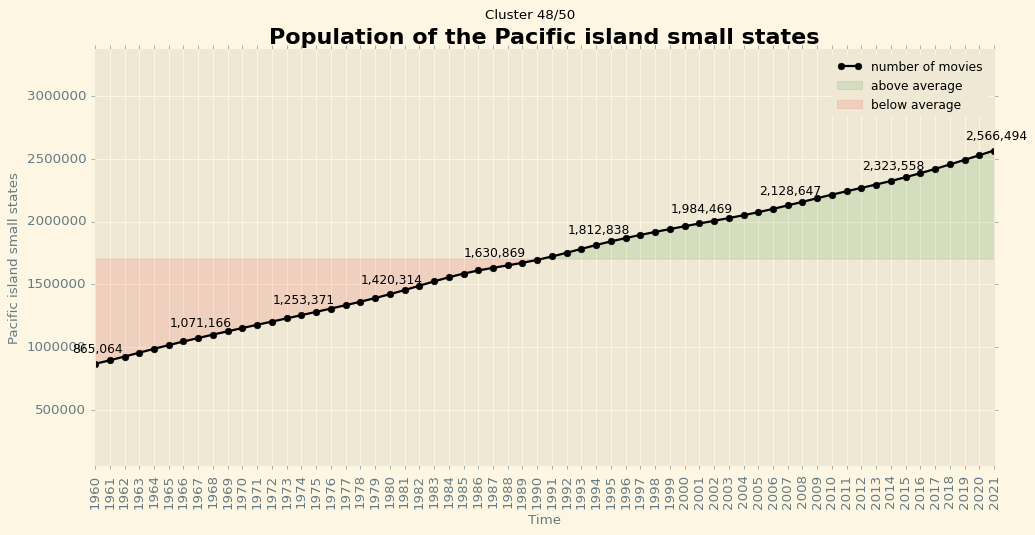

Kosovo


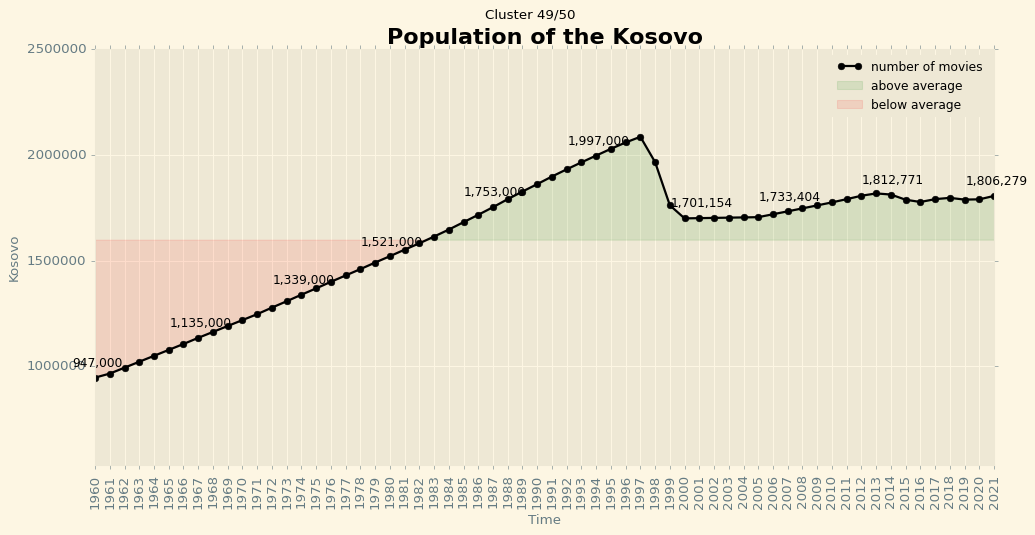

Channel Islands


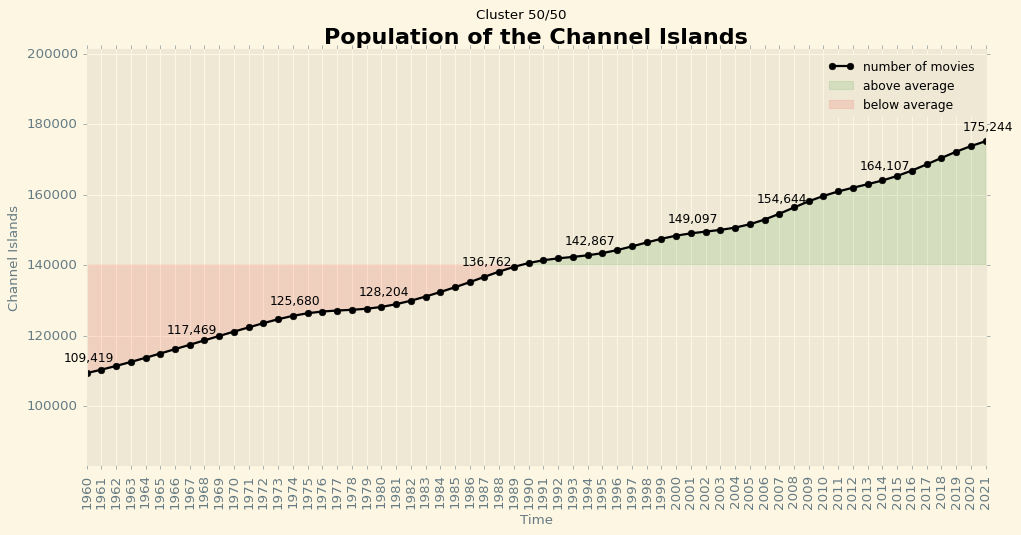

In [11]:
plt.style.use('Solarize_Light2')
date = 'date'
counter_n = 1
for target in df_cluster.columns[1:]:
    y = aggregate_period(df_cluster, 'y', date, target)
    print(target)
    visual(y ,date,target,f"Population of the {target}",100,1,10, scientific_annotation=False,big_title='cluster', counter = counter_n)
    counter_n+=1

Singapore is one of the best country in handling COVID-19 but the population is dropping. It does not convincing that it is caused by the fatality of COVID-19, but for other reasons for sure. This can be parked for the future work for studying it further. Thank you for viewing.

Author: Morris Lee <br>
Date: 3rd Sept 2022